In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
from matplotlib.font_manager import FontProperties
import itertools
from IPython.display import display
import math
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches
from IPython.display import display, HTML
sns.set_theme(
    style="white", 
    palette="colorblind",
    rc={
        "figure.figsize": (12, 6),
        "axes.titlesize": 20,
        "axes.titleweight": "bold",
        "axes.labelsize": 16,
        "axes.labelweight": "bold",
        "xtick.labelsize": 13,
        "ytick.labelsize": 13,
        "xtick.major.width": 1,
        "ytick.major.width": 1,
        "axes.linewidth": 1,
        "legend.fontsize": 13,
        "legend.title_fontsize": 14,
        "axes.edgecolor": "#888888",
        "font.family": "sans-serif",
        "font.sans-serif": ["DejaVu Sans", "Arial", "Roboto"],
    }
)

In [2]:
df_all = pd.read_csv("all_fulldump_fin.csv", sep=';')
df_mut = pd.read_csv("mutation_report_FIN.csv", sep=';')
df_loop   = pd.read_csv("feedback_report_all_FIN.csv", sep=';')

In [3]:
df_tests = df_all[df_all["Source"] == "tests"].copy()
df_tests_url = df_all[df_all["Source"].isin(["URLfix"])].copy()
df_tests_driver = df_all[df_all["Source"].isin(["DriverFix"])].copy()
df_failed_fix = df_all[df_all["Source"].isin(["DriverFix"])].copy()
df_failed = df_all[df_all["Source"] == "StateFix"]

print("df_tests:", df_tests.shape)
print("df_tests_url:", df_tests_url.shape)
print("df_tests_driver:", df_tests_driver.shape)
print("df_failed_fix:", df_failed_fix.shape)
print("df_failed:", df_failed.shape)

df_tests: (4426, 17)
df_tests_url: (4426, 17)
df_tests_driver: (4426, 17)
df_failed_fix: (4426, 17)
df_failed: (2981, 17)


In [4]:
key_columns = ["Project", "Model", "PromptType", "Resolution", "RunID", "Test Type", "TestModule"]
df_successful_failed = df_failed[df_failed["Status"] == "SUCCESS"]
df_failed_fix_updated = df_failed_fix.copy()
merged = df_failed_fix_updated.merge(
    df_successful_failed[key_columns + ["Status"]],
    on=key_columns,
    how="left",
    suffixes=("", "_from_failed"),
    indicator=True
)
merged["matched_success"] = merged["Status_from_failed"].eq("SUCCESS")
merged.loc[merged["matched_success"], "Status"] = "SUCCESS"
success_count = merged["Status"].eq("SUCCESS").sum()
debug = merged[(merged["_merge"] == "both") & (~merged["matched_success"]) & (~merged["Status"].eq("SUCCESS"))]
df_failed_fix_updated = merged.drop(columns=["Status_from_failed", "matched_success", "_merge"])
print("df_failed_fix_updated:", df_failed_fix_updated.shape)

df_failed_fix_updated: (4426, 17)


In [5]:
key_columns = ["Project", "Model", "PromptType", "Resolution", "RunID", "Test Type", "TestModule"]
def make_key(df):
    return df[key_columns].astype(str).agg("|".join, axis=1)
df_failed_fix_updated["_merge_key"] = make_key(df_failed_fix_updated)
df_tests_url["_merge_key"] = make_key(df_tests_url)
confirmed_success_keys = set(df_tests_url[df_tests_url["Status"] == "SUCCESS"]["_merge_key"])
almost_success_df = df_failed_fix_updated[
    (df_failed_fix_updated["Status"] == "SUCCESS") &
    (~df_failed_fix_updated["_merge_key"].isin(confirmed_success_keys))
].copy()
almost_success_df["Status"] = "ALMOST_SUCCESS"
confirmed_success_df = df_tests_url[df_tests_url["Status"] == "SUCCESS"].copy()
used_keys = set(confirmed_success_df["_merge_key"]) | set(almost_success_df["_merge_key"])
other_rows = df_failed_fix_updated[~df_failed_fix_updated["_merge_key"].isin(used_keys)].copy()
df_fixed_labeled = pd.concat([confirmed_success_df, almost_success_df, other_rows], ignore_index=True)
df_fixed_labeled.drop(columns=["_merge_key"], inplace=True)
df_failed_fix_updated.drop(columns=["_merge_key"], inplace=True)
df_tests_url.drop(columns=["_merge_key"], inplace=True)
status_counts = df_fixed_labeled["Status"].value_counts()
for label in ["SUCCESS", "ALMOST_SUCCESS", "FAIL", "ERROR", "LOAD_ERROR", "FALSE_SUCCESS"]:
    print(f"{label}: {status_counts.get(label, 0)}")


SUCCESS: 1006
ALMOST_SUCCESS: 259
FAIL: 1267
ERROR: 1410
LOAD_ERROR: 471
FALSE_SUCCESS: 14


In [6]:
status_counts = df_tests_url["Status"].value_counts()
for label in ["SUCCESS", "ALMOST_SUCCESS", "FAIL", "ERROR", "LOAD_ERROR", "FALSE_SUCCESS"]:
    print(f"{label}: {status_counts.get(label, 0)}")

SUCCESS: 1006
ALMOST_SUCCESS: 0
FAIL: 1014
ERROR: 1984
LOAD_ERROR: 408
FALSE_SUCCESS: 14


C:\Users\DK00747\AppData\Local\Temp\ipykernel_27060\2997743647.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


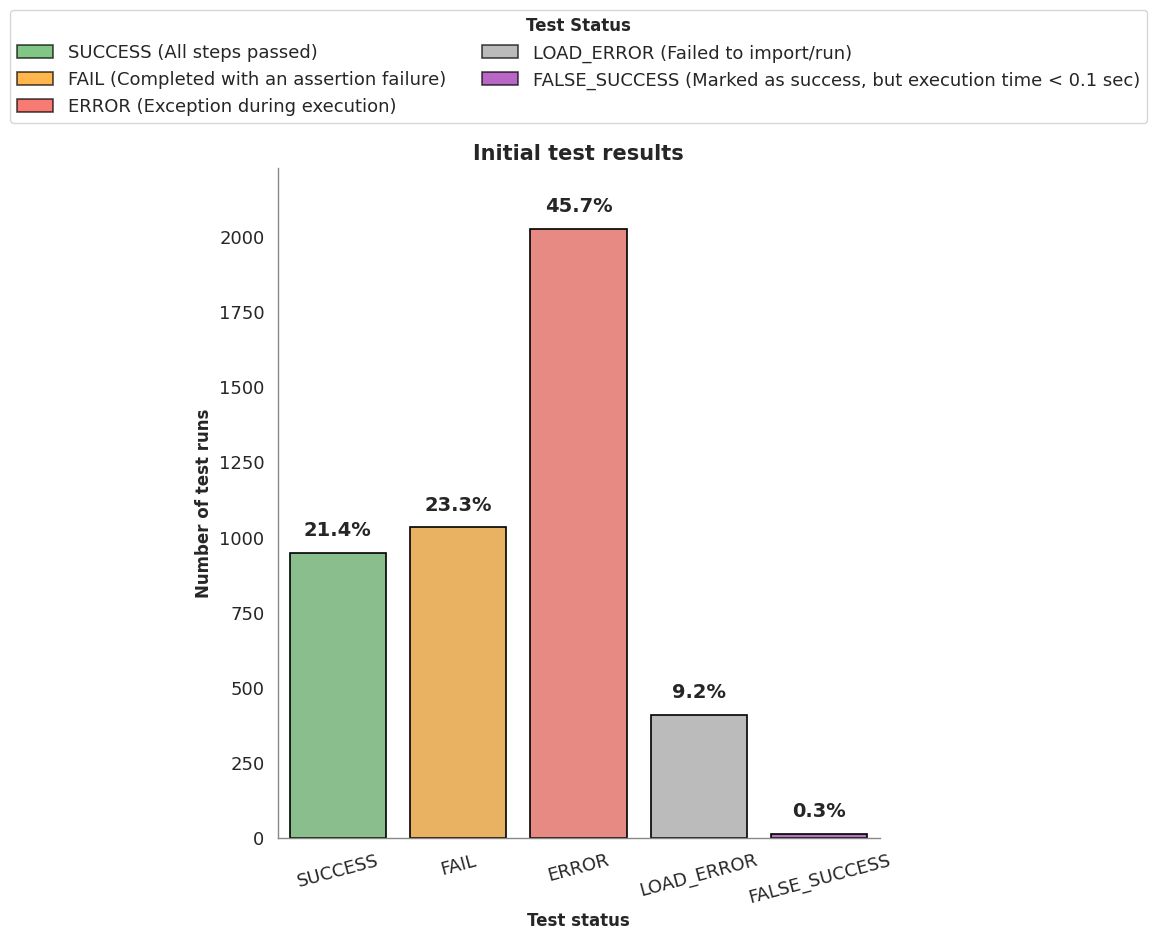

C:\Users\DK00747\AppData\Local\Temp\ipykernel_27060\2997743647.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


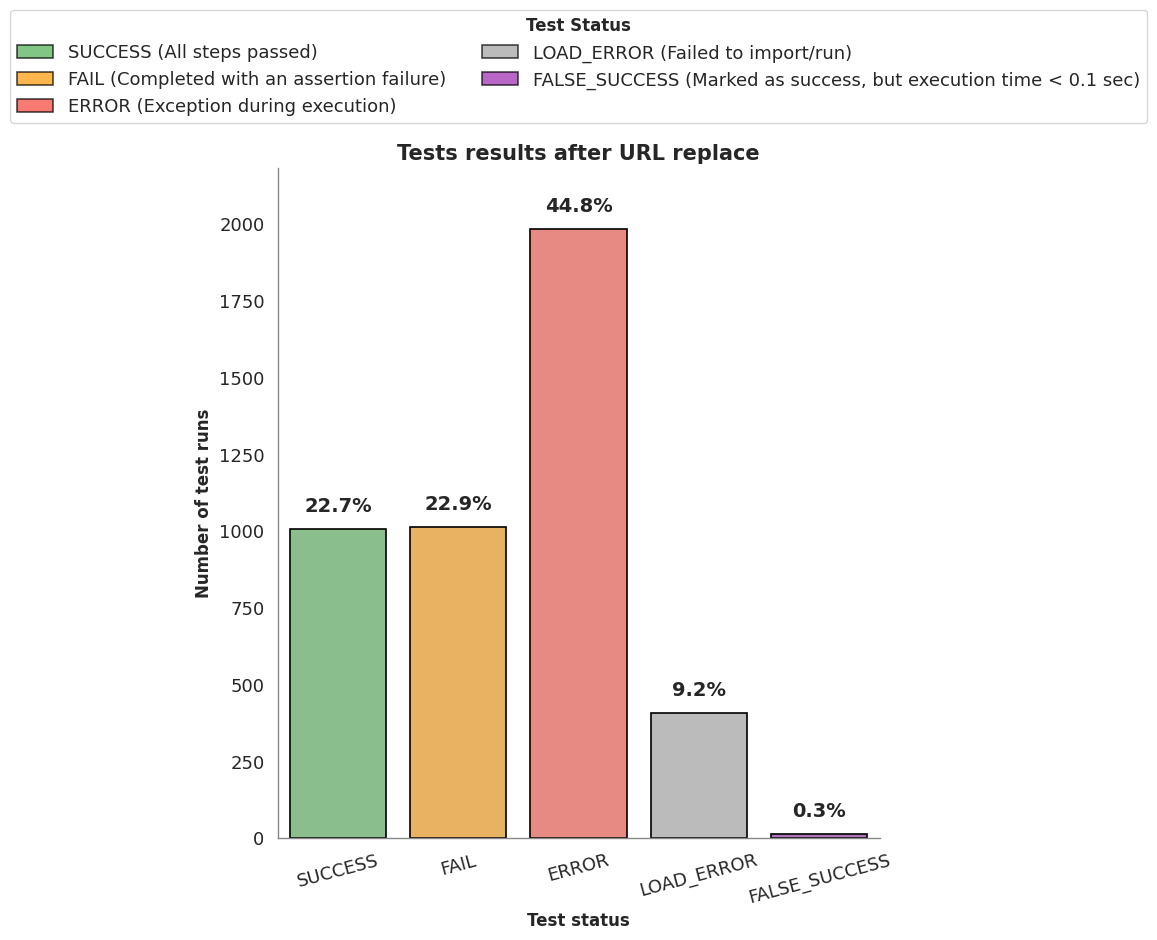

C:\Users\DK00747\AppData\Local\Temp\ipykernel_27060\2997743647.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


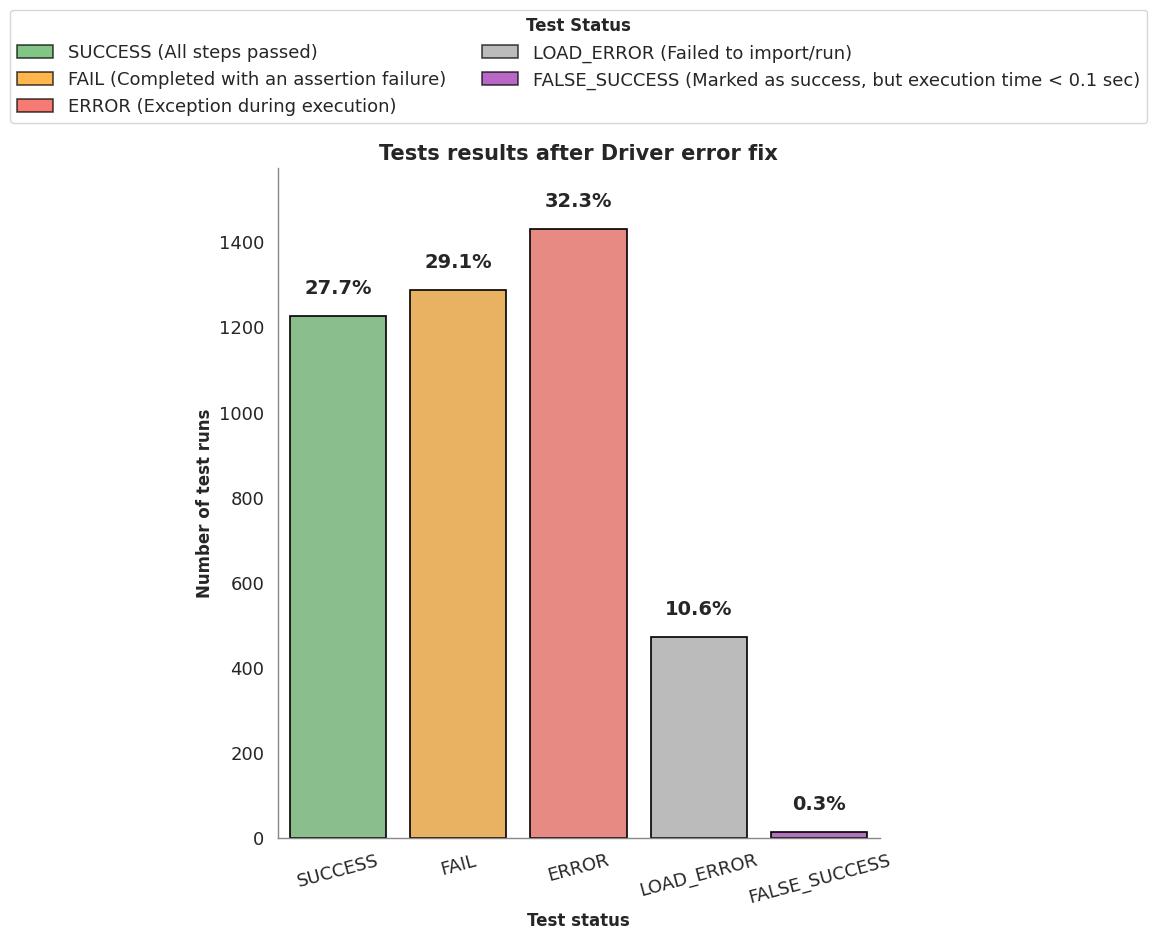

C:\Users\DK00747\AppData\Local\Temp\ipykernel_27060\2997743647.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


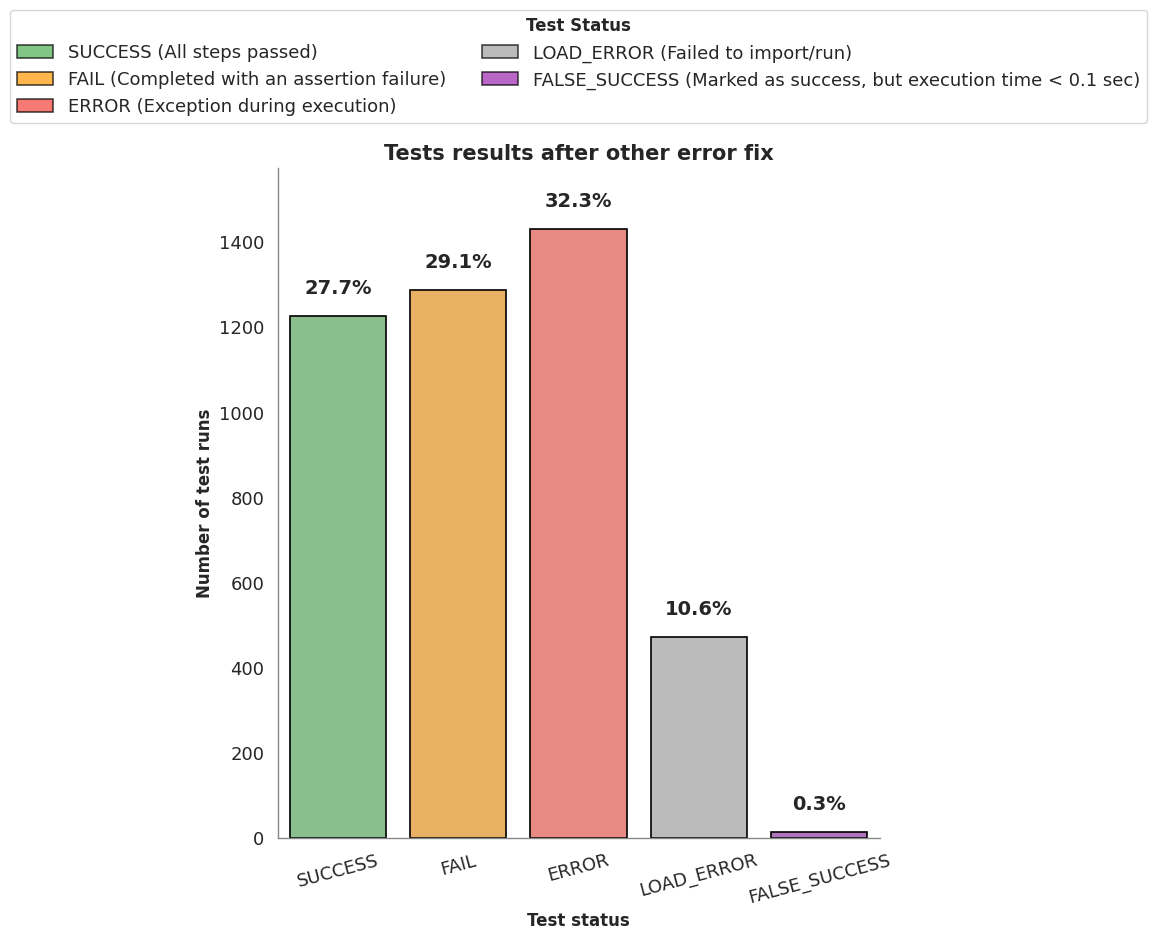

Count                                               percent  \
Source          tests testsDriverChange testsFailFix testsURLchange   tests   
Status                                                                        
ERROR          2024.0            1430.0       1430.0         1984.0    45.7   
FAIL           1032.0            1286.0       1286.0         1014.0    23.3   
FALSE_SUCCESS    14.0              14.0         14.0           14.0     0.3   
LOAD_ERROR      408.0             471.0        471.0          408.0     9.2   
SUCCESS         948.0            1225.0       1225.0         1006.0    21.4   

                                                             
Source        testsDriverChange testsFailFix testsURLchange  
Status                                                       
ERROR                      32.3         32.3           44.8  
FAIL                       29.1         29.1           22.9  
FALSE_SUCCESS               0.3          0.3            0.3  
LOAD_ERROR                 10.6         10.6            9.2  
SUCCESS                    27.7         27.7           22.7

In [7]:
summary_table = []
status_labels = {
    "SUCCESS": "SUCCESS (All steps passed)",
    "ERROR": "ERROR (Exception during execution)",
    "LOAD_ERROR": "LOAD_ERROR (Failed to import/run)",
    "FALSE_SUCCESS": "FALSE_SUCCESS (Marked as success, but execution time < 0.1 sec)",
    "FAIL": "FAIL (Сompleted with an assertion failure)"
}
custom_colors = {
    "SUCCESS": "#4CAF50",
    "ERROR": "#F44336",
    "LOAD_ERROR": "#9E9E9E",
    "FALSE_SUCCESS": "#9C27B0",
    "FAIL": "#FF9800"  
}
status_order = ["SUCCESS", "FAIL", "ERROR", "LOAD_ERROR", "FALSE_SUCCESS"]  
plot_titles = {
    "tests": "Initial test results",
    "testsURLchange": "Tests results after URL replace",
    "testsDriverChange": "Tests results after Driver error fix",
    "testsFailFix": "Tests results after other error fix"
}
df_sources = {
    "tests": df_tests,
    "testsURLchange": df_tests_url,
    "testsDriverChange": df_tests_driver,
    "testsFailFix": df_failed_fix
}
for source_name, df_filtered in df_sources.items():
    status_total = (
        df_filtered["Status"]
        .value_counts()
        .rename_axis("Status")
        .reset_index(name="Count")
    )
    status_total = status_total.set_index("Status").reindex(status_order).reset_index()
    status_total["Count"] = status_total["Count"].fillna(0).astype(int)
    status_total["percent"] = (status_total["Count"] / status_total["Count"].sum()) * 100
    status_total["Source"] = source_name
    summary_table.append(status_total)
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(
        data=status_total,
        x="Status",
        y="Count",
        order=status_order,
        palette=[custom_colors[s] for s in status_order],
        ax=ax
    )
    for patch in ax.patches:
        facecolor = patch.get_facecolor()
        patch.set_facecolor((*facecolor[:3], 0.7))  
        patch.set_edgecolor("black")
        patch.set_linewidth(1.2)
    plt.title(plot_titles.get(source_name, source_name), fontsize=15)
    plt.ylabel("Number of test runs", fontsize=12)
    plt.xlabel("Test status", fontsize=12)
    plt.xticks(rotation=15)
    
    for i, row in status_total.iterrows():
        if row["Count"] > 0:
            label = f"{row['percent']:.1f}%"
            ax.text(i, row["Count"] + status_total["Count"].sum() * 0.01, label, ha='center', va='bottom', fontsize=14, fontweight="bold")

    legend_labels = [
    Patch(
        facecolor=custom_colors[s],
        edgecolor="black",
        linewidth=1.2,
        alpha=0.7,
        label=status_labels[s]
    )
    for s in status_order
]
    plt.legend(handles=legend_labels, title="Test Status", title_fontproperties=FontProperties(weight="bold"), loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=2)
    
    plt.ylim(0, status_total["Count"].max() * 1.1)
    sns.despine()
    plt.tight_layout()
    plt.subplots_adjust(top=1.3)
    plt.show()
final_summary = pd.concat(summary_table, ignore_index=True)[["Source", "Status", "Count", "percent"]]
final_summary["percent"] = final_summary["percent"].round(1) 
display(final_summary.pivot(index="Status", columns="Source", values=["Count", "percent"]))

In [8]:
status_order = ["SUCCESS", "FAIL", "ERROR", "LOAD_ERROR", "FALSE_SUCCESS"]
def prepare_status_table(df, label):
    counts = df["Status"].value_counts().reindex(status_order).fillna(0).astype(int)
    total = counts.sum()
    percents = (counts / total * 100).round(1)
    combined = percents.astype(str) + '% (' + counts.astype(str) + ')'
    return pd.DataFrame({label: combined}), total
table_initial, total_initial = prepare_status_table(df_tests, "Initial results")
table_after_fix, total_after = prepare_status_table(df_tests_url, "After URL fix")
summary_table = pd.concat([table_initial, table_after_fix], axis=1)
total_row = pd.DataFrame({
    "Initial results": f"100.0% ({total_initial})",
    "After URL fix": f"100.0% ({total_after})"
}, index=["Total"])
summary_table = pd.concat([summary_table, total_row])
display(summary_table)



,Initial results,After URL fix
SUCCESS,21.4% (948),22.7% (1006)
FAIL,23.3% (1032),22.9% (1014)
ERROR,45.7% (2024),44.8% (1984)
LOAD_ERROR,9.2% (408),9.2% (408)
FALSE_SUCCESS,0.3% (14),0.3% (14)
Total,100.0% (4426),100.0% (4426)


C:\Users\DK00747\AppData\Local\Temp\ipykernel_27060\2867416687.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


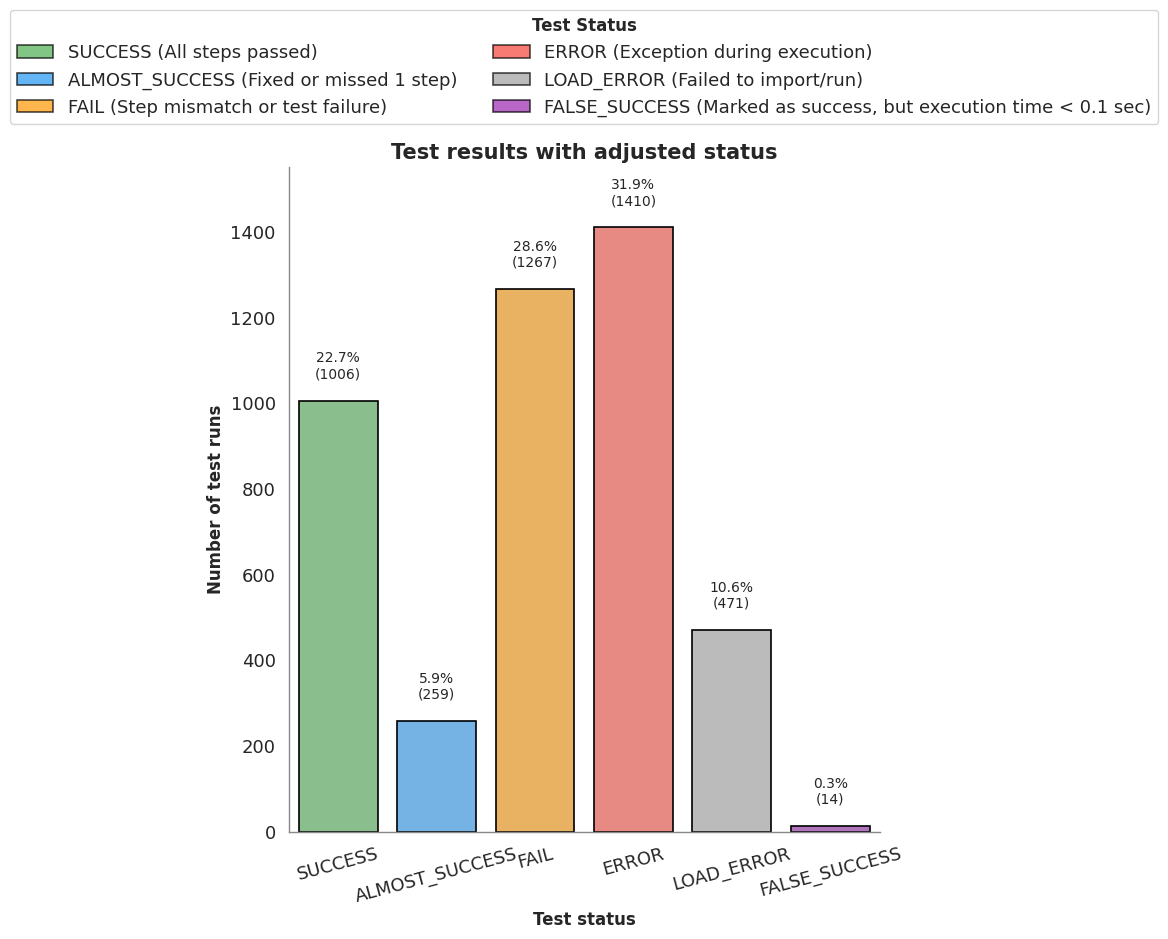

In [9]:
status_labels = {
    "SUCCESS": "SUCCESS (All steps passed)",    
    "ALMOST_SUCCESS": "ALMOST_SUCCESS (Fixed or missed 1 step)",
    "ERROR": "ERROR (Exception during execution)",
    "LOAD_ERROR": "LOAD_ERROR (Failed to import/run)",
    "FALSE_SUCCESS": "FALSE_SUCCESS (Marked as success, but execution time < 0.1 sec)",
    "FAIL": "FAIL (Step mismatch or test failure)"
}
custom_colors = {
    "SUCCESS": "#4CAF50",
    "ALMOST_SUCCESS": "#2196F3",
    "ERROR": "#F44336",
    "LOAD_ERROR": "#9E9E9E",
    "FALSE_SUCCESS": "#9C27B0",
    "FAIL": "#FF9800"  
}
status_order = ["SUCCESS", "ALMOST_SUCCESS", "FAIL", "ERROR", "LOAD_ERROR", "FALSE_SUCCESS"]  
df_sources = {
    "df_fixed_labeled": df_fixed_labeled
}
for source_name, df_filtered in df_sources.items():
    status_total = (
        df_filtered["Status"]
        .value_counts()
        .rename_axis("Status")
        .reset_index(name="Count")
    )
    status_total = status_total.set_index("Status").reindex(status_order).reset_index()
    status_total["Count"] = status_total["Count"].fillna(0).astype(int)
    status_total["percent"] = (status_total["Count"] / status_total["Count"].sum()) * 100
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(
        data=status_total,
        x="Status",
        y="Count",
        order=status_order,
        palette=[custom_colors[s] for s in status_order],
        ax=ax
    )
    for patch in ax.patches:
        facecolor = patch.get_facecolor()
        patch.set_facecolor((*facecolor[:3], 0.7)) 
        patch.set_edgecolor("black")
        patch.set_linewidth(1.2)
    
    plt.title("Test results with adjusted status", fontsize=15)
    plt.ylabel("Number of test runs", fontsize=12)
    plt.xlabel("Test status", fontsize=12)
    plt.xticks(rotation=15)
    for i, row in status_total.iterrows():
        if row["Count"] > 0:
            label = f"{row['percent']:.1f}%\n({int(row['Count'])})"
            ax.text(i, row["Count"] + status_total["Count"].sum() * 0.01, label, ha='center', va='bottom', fontsize=10)

    legend_labels = [
    Patch(
        facecolor=custom_colors[s],
        edgecolor="black",
        linewidth=1.2,
        alpha=0.7,
        label=status_labels[s]
    )
    for s in status_order
]
    plt.legend(handles=legend_labels, title="Test Status", title_fontproperties=FontProperties(weight="bold"), loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=2)
    
    plt.ylim(0, status_total["Count"].max() * 1.1)
    sns.despine()
    plt.tight_layout()
    plt.subplots_adjust(top=1.3)
    plt.show()


In [10]:
df_fixed_labeled["_merge_key"] = make_key(df_fixed_labeled)
df_tests_url["_merge_key"] = make_key(df_tests_url)
df_almost_success = df_fixed_labeled[df_fixed_labeled["Status"] == "ALMOST_SUCCESS"].copy()
df_almost_success_with_error = pd.merge(
    df_almost_success[["_merge_key"]],
    df_tests_url[["_merge_key", "ErrorType"]],
    on="_merge_key",
    how="left"
).drop_duplicates(subset="_merge_key")
df_fixed_labeled = pd.merge(
    df_fixed_labeled,
    df_almost_success_with_error,
    on="_merge_key",
    how="left",
    suffixes=("", "_from_tests")
)

mask = df_fixed_labeled["Status"] == "ALMOST_SUCCESS"
df_fixed_labeled.loc[mask, "ErrorType"] = df_fixed_labeled.loc[mask, "ErrorType_from_tests"]
df_fixed_labeled.drop(columns=["_merge_key", "ErrorType_from_tests"], inplace=True)
df_tests_url.drop(columns=["_merge_key"], inplace=True)


In [11]:
group_fields_success = ["Project", "Model", "Test Type", "TestModule"]
group_fields_almost = ["Project", "Model", "Test Type", "TestModule", "ErrorType"]
success_combinations = (
    df_fixed_labeled[df_fixed_labeled["Status"] == "SUCCESS"][group_fields_success]
    .drop_duplicates()
)
almost_success_combinations = (
    df_fixed_labeled[df_fixed_labeled["Status"] == "ALMOST_SUCCESS"][group_fields_almost]
    .drop_duplicates()
)
success_list = list(success_combinations.itertuples(index=False, name=None))
almost_success_list = list(almost_success_combinations.itertuples(index=False, name=None))


In [12]:
group_fields = ["Project", "Model", "Test Type", "TestModule"]
def most_common(series):
    return series.mode().iloc[0] if not series.mode().empty else None
step_success = (
    df_fixed_labeled[df_fixed_labeled["Status"] == "SUCCESS"]
    .groupby(group_fields)["Step count"]
    .agg(most_common)
    .reset_index()
    .rename(columns={"Step count": "StepCount_SUCCESS"})
)
step_almost = (
    df_fixed_labeled[df_fixed_labeled["Status"] == "ALMOST_SUCCESS"]
    .groupby(group_fields)["Step count"]
    .agg(most_common)
    .reset_index()
    .rename(columns={"Step count": "StepCount_ALMOST_SUCCESS"})
)
step_comparison = pd.merge(
    step_success,
    step_almost,
    on=group_fields,
    how="inner"
)
step_diff = step_comparison[step_comparison["StepCount_SUCCESS"] != step_comparison["StepCount_ALMOST_SUCCESS"]]

In [13]:
group_fields = ["Project", "Model", "Test Type", "TestModule"]
success_combinations = df_fixed_labeled[df_fixed_labeled["Status"] == "SUCCESS"][group_fields].drop_duplicates()
almost_success_combinations = df_fixed_labeled[df_fixed_labeled["Status"] == "ALMOST_SUCCESS"][group_fields].drop_duplicates()
success_list = success_combinations.itertuples(index=False, name=None)
almost_success_list = almost_success_combinations.itertuples(index=False, name=None)
success_list = list(success_list)
almost_success_list = list(almost_success_list)


In [14]:
almost_success_errors = df_fixed_labeled[df_fixed_labeled["Status"] == "ALMOST_SUCCESS"]["ErrorType"]
unique_error_types = almost_success_errors.dropna().unique()

In [15]:
key_fields_success = ["Project", "Model", "Test Type", "TestModule"]
key_fields_almost = ["Project", "Model", "Test Type", "TestModule", "ErrorType"]
success_step_map = (
    df_fixed_labeled[df_fixed_labeled["Status"] == "SUCCESS"]
    .groupby(key_fields_success)["Step count"]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index()
    .rename(columns={"Step count": "StepCount_SUCCESS"})
)

almost_step_map = (
    df_fixed_labeled[df_fixed_labeled["Status"] == "ALMOST_SUCCESS"]
    .groupby(key_fields_almost)["Step count"]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index()
    .rename(columns={"Step count": "StepCount_ALMOST_SUCCESS"})
)
df_fail_or_error = df_fixed_labeled[df_fixed_labeled["Status"].isin(["FAIL", "ERROR"])].copy()
df_fail_or_error["_key_success"] = df_fail_or_error[key_fields_success].astype(str).agg("|".join, axis=1)
df_fail_or_error["_key_almost"] = df_fail_or_error[key_fields_almost].astype(str).agg("|".join, axis=1)

success_step_map["_key_success"] = success_step_map[key_fields_success].astype(str).agg("|".join, axis=1)
almost_step_map["_key_almost"] = almost_step_map[["Project", "Model", "Test Type", "TestModule", "ErrorType"]].astype(str).agg("|".join, axis=1)
success_dict = dict(zip(success_step_map["_key_success"], success_step_map["StepCount_SUCCESS"]))
almost_dict = dict(zip(almost_step_map["_key_almost"], almost_step_map["StepCount_ALMOST_SUCCESS"]))
def should_be_potential_success(row):
    sc = row["Step count"]
    key_s = row["_key_success"]
    key_a = row["_key_almost"]
    
    if pd.isna(sc):
        return False
    
    if key_a in almost_dict and abs(sc - almost_dict[key_a]) <= 1:
        return True
    if key_s in success_dict and abs(sc - success_dict[key_s]) <= 1:
        return True
    return False


df_fail_or_error.loc[
    df_fail_or_error.apply(should_be_potential_success, axis=1),
    "Status"
] = "POTENTIAL_SUCCESS"

df_fail_or_error.drop(columns=["_key_success", "_key_almost"], inplace=True)
df_fixed_labeled.update(df_fail_or_error)


In [16]:
df_fixed_labeled.loc[df_fixed_labeled["Status"] == "FAIL", "Status"] = "ERROR"


C:\Users\DK00747\AppData\Local\Temp\ipykernel_27060\3653926300.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


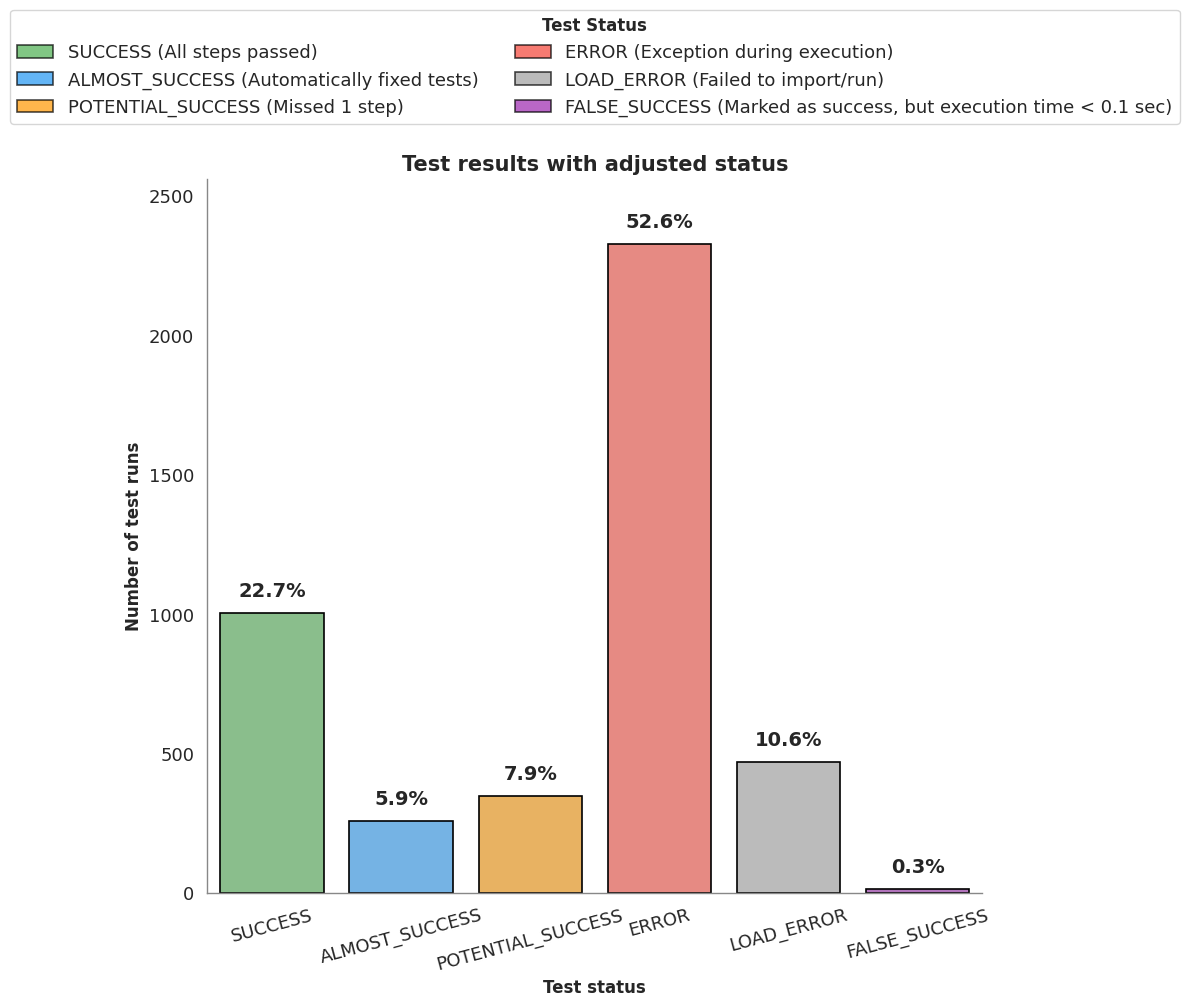

In [17]:
status_labels = {
    "SUCCESS": "SUCCESS (All steps passed)", 
    "ALMOST_SUCCESS": "ALMOST_SUCCESS (Automatically fixed tests)",
    "POTENTIAL_SUCCESS": "POTENTIAL_SUCCESS (Missed 1 step)",
    "ERROR": "ERROR (Exception during execution)",
    "LOAD_ERROR": "LOAD_ERROR (Failed to import/run)",
    "FALSE_SUCCESS": "FALSE_SUCCESS (Marked as success, but execution time < 0.1 sec)"
}

custom_colors = {
    "SUCCESS": "#4CAF50",
    "ALMOST_SUCCESS": "#2196F3",
    "POTENTIAL_SUCCESS":"#FF9800",
    "ERROR": "#F44336",
    "LOAD_ERROR": "#9E9E9E",
    "FALSE_SUCCESS": "#9C27B0"
}

status_order = ["SUCCESS", "ALMOST_SUCCESS", "POTENTIAL_SUCCESS", "ERROR", "LOAD_ERROR", "FALSE_SUCCESS"]  

df_sources = {
    "df_fixed_labeled": df_fixed_labeled
}

for source_name, df_filtered in df_sources.items():
    status_total = (
        df_filtered["Status"]
        .value_counts()
        .rename_axis("Status")
        .reset_index(name="Count")
    )

    status_total = status_total.set_index("Status").reindex(status_order).reset_index()
    status_total["Count"] = status_total["Count"].fillna(0).astype(int)
    status_total["percent"] = (status_total["Count"] / status_total["Count"].sum()) * 100

    fig, ax = plt.subplots(figsize=(10, 6))
    
    sns.barplot(
        data=status_total,
        x="Status",
        y="Count",
        order=status_order,
        palette=[custom_colors[s] for s in status_order],
        ax=ax
    )
    
    for patch in ax.patches:
        facecolor = patch.get_facecolor()
        patch.set_facecolor((*facecolor[:3], 0.7))  
        patch.set_edgecolor("black")
        patch.set_linewidth(1.2)
    
    plt.title("Test results with adjusted status", fontsize=15)
    plt.ylabel("Number of test runs", fontsize=12)
    plt.xlabel("Test status", fontsize=12)
    plt.xticks(rotation=15)
    
    for i, row in status_total.iterrows():
        if row["Count"] > 0:
            label = f"{row['percent']:.1f}%"
            ax.text(i, row["Count"] + status_total["Count"].sum() * 0.01, label, ha='center', va='bottom', fontsize=14, fontweight="bold")

    legend_labels = [
    Patch(
        facecolor=custom_colors[s],
        edgecolor="black",
        linewidth=1.2,
        alpha=0.7,
        label=status_labels[s]
    )
    for s in status_order
]
    plt.legend(handles=legend_labels, title="Test Status", title_fontproperties=FontProperties(weight="bold"), loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=2)
    
    plt.ylim(0, status_total["Count"].max() * 1.1)
    sns.despine()
    #plt.tight_layout()
    plt.subplots_adjust(top=1.3)
    plt.show()


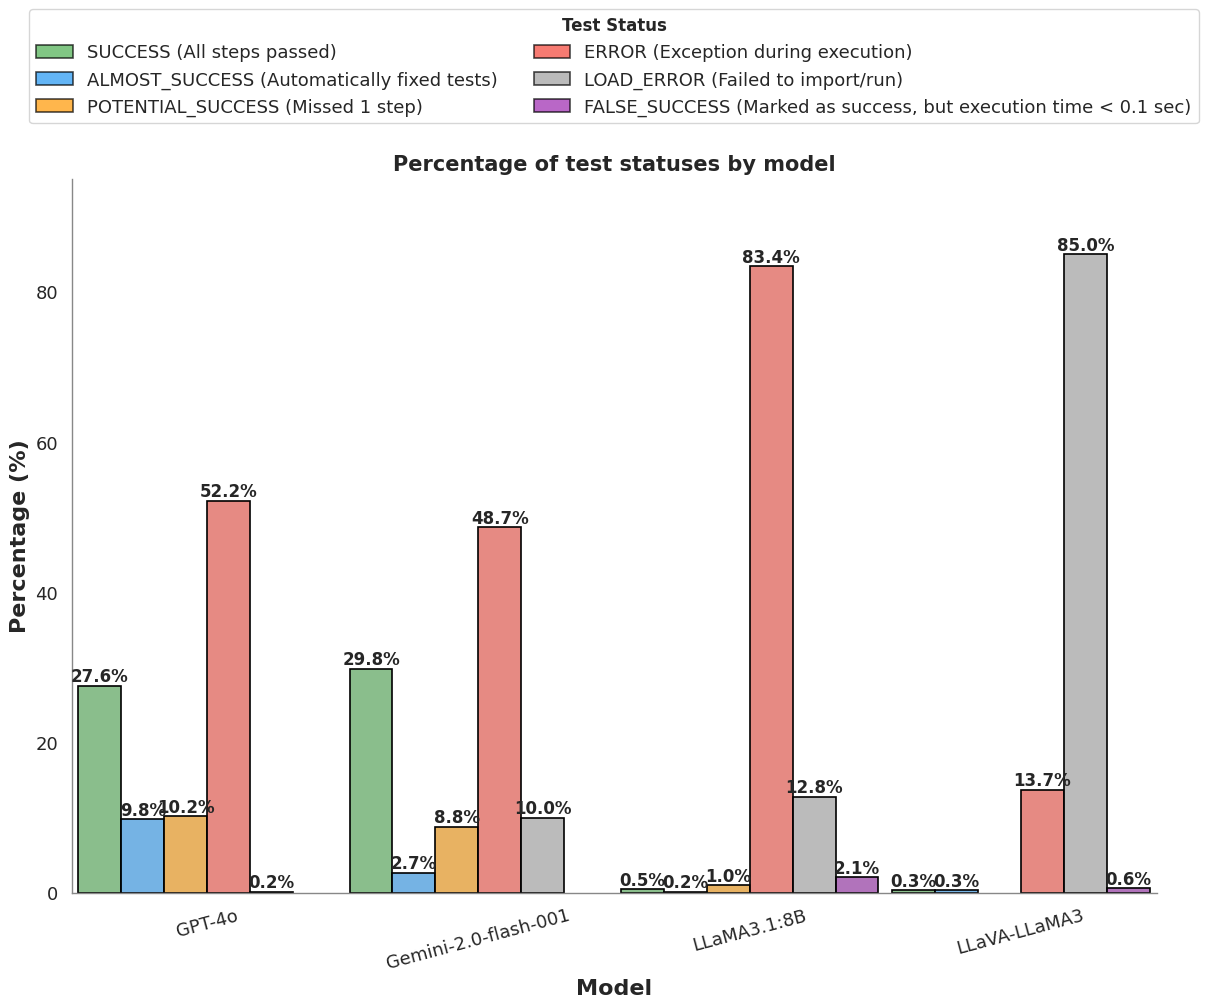

In [18]:
model_mapping = {
    "gpt4o": "GPT-4o",
    "gpt4oHTML": "GPT-4o",
    "llava-llamav3": "LLaVA-LLaMA3",
    "llava-llamav3HTML": "LLaVA-LLaMA3",
    "llava7bllama3.1.8b": "LLaMA3.1:8B",
    "llava7bllama3.1.8bHTML": "LLaMA3.1:8B",
    "gemini": "Gemini-2.0-flash-001",
    "geminiHTML": "Gemini-2.0-flash-001"
}
df_fixed_labeled["Model"] = df_fixed_labeled["Model"].replace(model_mapping)
status_counts = (
    df_fixed_labeled
    .groupby(["Model", "Status"])
    .size()
    .reset_index(name="Count")
)
model_totals = (
    df_fixed_labeled
    .groupby("Model")
    .size()
    .reset_index(name="Total")
)
status_counts = status_counts.merge(model_totals, on="Model")
status_counts["percent"] = (status_counts["Count"] / status_counts["Total"]) * 100
status_labels = {
    "SUCCESS": "SUCCESS (All steps passed)", 
    "ALMOST_SUCCESS": "ALMOST_SUCCESS (Automatically fixed tests)",
    "POTENTIAL_SUCCESS": "POTENTIAL_SUCCESS (Missed 1 step)",
    "ERROR": "ERROR (Exception during execution)",
    "LOAD_ERROR": "LOAD_ERROR (Failed to import/run)",
    "FALSE_SUCCESS": "FALSE_SUCCESS (Marked as success, but execution time < 0.1 sec)"
}

custom_colors = {
    "SUCCESS": "#4CAF50",
    "ALMOST_SUCCESS": "#2196F3",
    "POTENTIAL_SUCCESS": "#FF9800",
    "ERROR": "#F44336",
    "LOAD_ERROR": "#9E9E9E",
    "FALSE_SUCCESS": "#9C27B0"
}

status_order = ["SUCCESS", "ALMOST_SUCCESS", "POTENTIAL_SUCCESS", "ERROR", "LOAD_ERROR", "FALSE_SUCCESS"]

plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=status_counts,
    x="Model",
    y="percent",
    hue="Status",
    hue_order=status_order,
    palette=[custom_colors[s] for s in status_order],
    width=0.95
)

for patch in ax.patches:
    facecolor = patch.get_facecolor()
    patch.set_facecolor((*facecolor[:3], 0.7)) 
    patch.set_edgecolor("black")
    patch.set_linewidth(1.2)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=12, fontweight="bold")
legend_labels = [
    Patch(
        facecolor=custom_colors[s],
        edgecolor="black",
        linewidth=1.2,
        alpha=0.7,
        label=status_labels[s]
    )
    for s in status_order
]

plt.legend(
    handles=legend_labels,
    title="Test Status",
    title_fontproperties=FontProperties(weight="bold"),
    loc='upper center',
    bbox_to_anchor=(0.5, 1.25),
    ncol=2
)
plt.title("Percentage of test statuses by model", fontsize=15)
plt.ylabel("Percentage (%)")
plt.xlabel("Model")
plt.xticks(rotation=15)
plt.ylim(0, 95)
sns.despine()
plt.subplots_adjust(top=1.3)
plt.show()



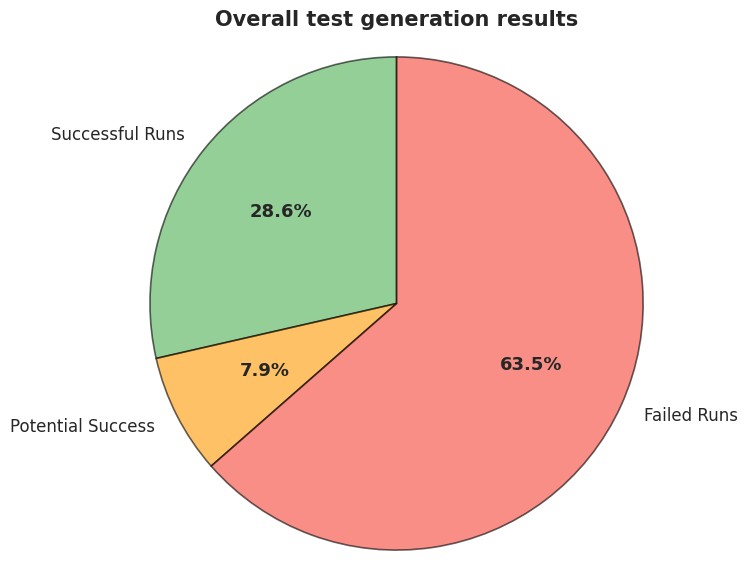

In [19]:
success_statuses = ["SUCCESS", "ALMOST_SUCCESS"]
potential_success_statuses = ["POTENTIAL_SUCCESS"]
failed_statuses = ["ERROR", "LOAD_ERROR", "FALSE_SUCCESS"]

success_count = df_fixed_labeled["Status"].isin(success_statuses).sum()
potential_success_count = df_fixed_labeled["Status"].isin(potential_success_statuses).sum()
failed_count = df_fixed_labeled["Status"].isin(failed_statuses).sum()

labels = ["Successful Runs", "Potential Success", "Failed Runs"]
counts = [success_count, potential_success_count, failed_count]
colors = ["#4CAF50", "#FF9800", "#F44336"] 
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    counts,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,  
    wedgeprops=dict(edgecolor="black", linewidth=1.2, alpha=0.6), 
    textprops={"fontsize": 12}
)

for autotext in autotexts:
    autotext.set_fontsize(13)
    autotext.set_weight("bold")

plt.title("Overall test generation results", fontsize=15)
ax.axis("equal")
#plt.tight_layout()
plt.show()


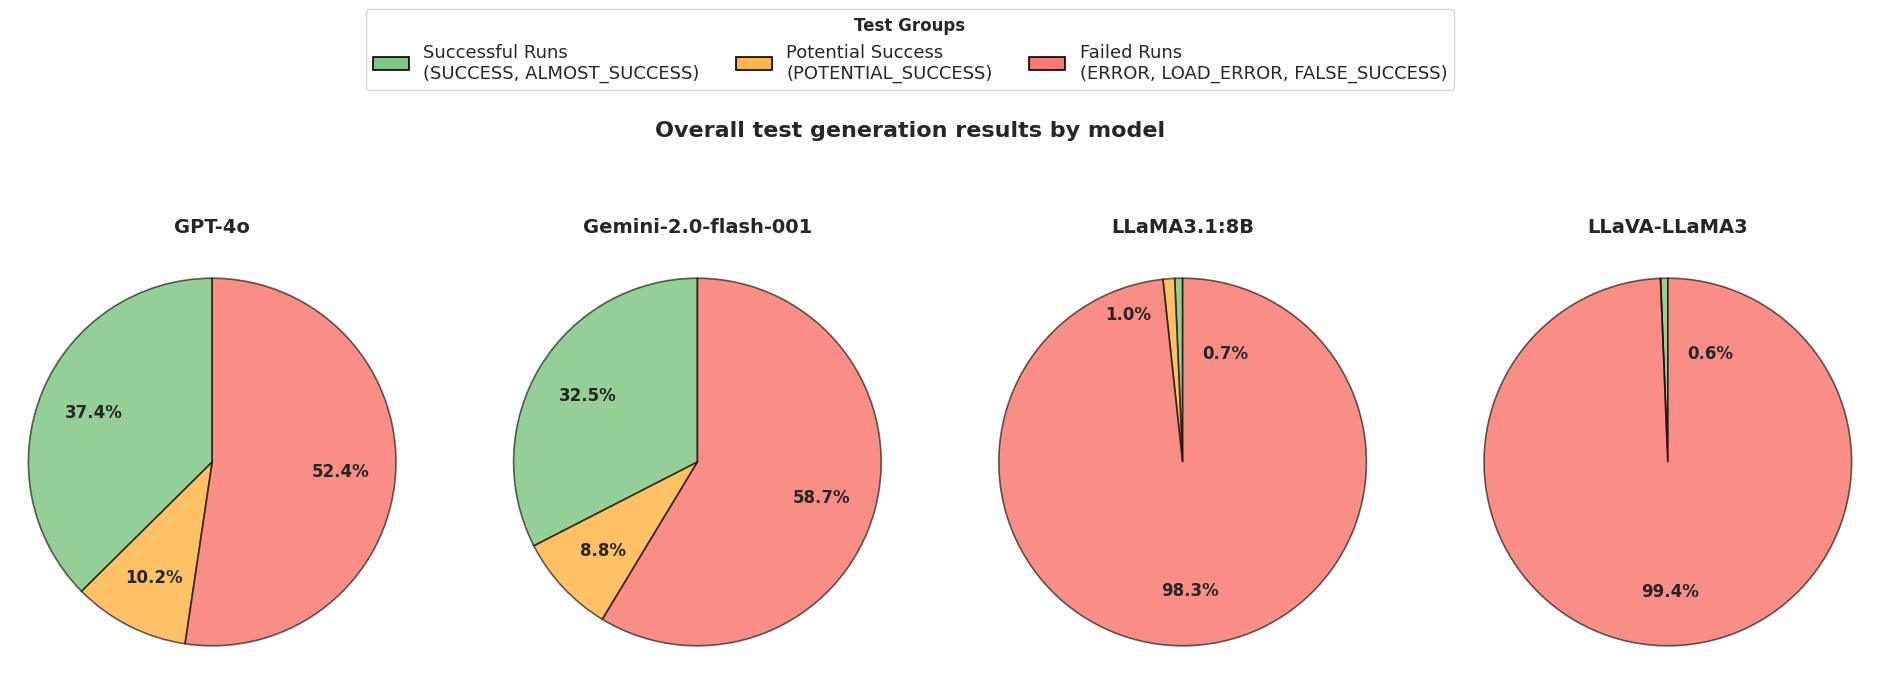

In [20]:
df_fixed_labeled["RawModel"] = df_fixed_labeled["Model"]

df_fixed_labeled = df_fixed_labeled.copy()
model_mapping = {
    "gpt4o": "GPT-4o",
    "gpt4oHTML": "GPT-4o",
    "gemini": "Gemini-2.0-flash-001",
    "geminiHTML": "Gemini-2.0-flash-001",
    "llava-llamav3": "LLaVA-LLaMA3",
    "llava-llamav3HTML": "LLaVA-LLaMA3",
    "llava7bllama3.1.8b": "LLaMA3.1:8B",
    "llava7bllama3.1.8bHTML": "LLaMA3.1:8B"
}

df_fixed_labeled["Model"] = df_fixed_labeled["Model"].replace(model_mapping)

success_statuses = ["SUCCESS", "ALMOST_SUCCESS"]
potential_success_statuses = ["POTENTIAL_SUCCESS"]
failed_statuses = ["ERROR", "LOAD_ERROR", "FALSE_SUCCESS"]

model_order = [
    "GPT-4o",
    "Gemini-2.0-flash-001",
    "LLaMA3.1:8B",
    "LLaVA-LLaMA3"
]

models = [m for m in model_order if m in df_fixed_labeled["Model"].unique()]
group_colors = {
    "Successful Runs": "#4CAF50",
    "Potential Success": "#FF9800",
    "Failed Runs": "#F44336"
}
fig, axes = plt.subplots(1, len(models), figsize=(6 * len(models), 6))
if len(models) == 1:
    axes = [axes]

for i, model in enumerate(models):
    df_model = df_fixed_labeled[df_fixed_labeled["Model"] == model]
    success_count = df_model["Status"].isin(success_statuses).sum()
    potential_success_count = df_model["Status"].isin(potential_success_statuses).sum()
    failed_count = df_model["Status"].isin(failed_statuses).sum()
    total = success_count + potential_success_count + failed_count
    counts = [success_count, potential_success_count, failed_count]
    ax = axes[i]
    wedges, _ = ax.pie(
        counts,
        startangle=90,
        colors=[group_colors[g] for g in group_colors.keys()],
        wedgeprops=dict(edgecolor="black", linewidth=1.2, alpha=0.6)
    )
    for j, wedge in enumerate(wedges):
        angle = (wedge.theta2 + wedge.theta1) / 2.
        angle_rad = np.deg2rad(angle)
        x = np.cos(angle_rad)
        y = np.sin(angle_rad)
        percent = counts[j] / total * 100 if total > 0 else 0
        if percent == 0:
            continue
        label = f"{percent:.1f}%"
        if percent >= 8:
            x_offset, y_offset = 0.0, 0.0
        elif percent >= 1:
            x_offset, y_offset = -0.35, 0.15
        else:
            x_offset, y_offset = 0.35, -0.15

        ax.text(
            (x + x_offset) * 0.7,
            (y + y_offset) * 0.7,
            label,
            ha='center',
            va='center',
            fontsize=12,
            weight="bold"
        )

    ax.set_title(f"{model}", fontsize=14, weight="bold")
    ax.axis("equal")

legend_labels = [
    Patch(facecolor=(*plt.matplotlib.colors.to_rgba("#4CAF50")[:3], 0.7), edgecolor="black", linewidth=1.2,
          label="Successful Runs\n(SUCCESS, ALMOST_SUCCESS)"),
    Patch(facecolor=(*plt.matplotlib.colors.to_rgba("#FF9800")[:3], 0.7), edgecolor="black", linewidth=1.2,
          label="Potential Success\n(POTENTIAL_SUCCESS)"),
    Patch(facecolor=(*plt.matplotlib.colors.to_rgba("#F44336")[:3], 0.7), edgecolor="black", linewidth=1.2,
          label="Failed Runs\n(ERROR, LOAD_ERROR, FALSE_SUCCESS)")
]

fig.legend(
    handles=legend_labels,
    title="Test Groups",
    title_fontproperties=FontProperties(weight="bold"),
    loc='upper center',
    bbox_to_anchor=(0.5, 1.25),
    ncol=3
)

plt.suptitle("Overall test generation results by model", fontsize=16, weight="bold", y=1.05)
plt.subplots_adjust(top=0.85)
plt.show()


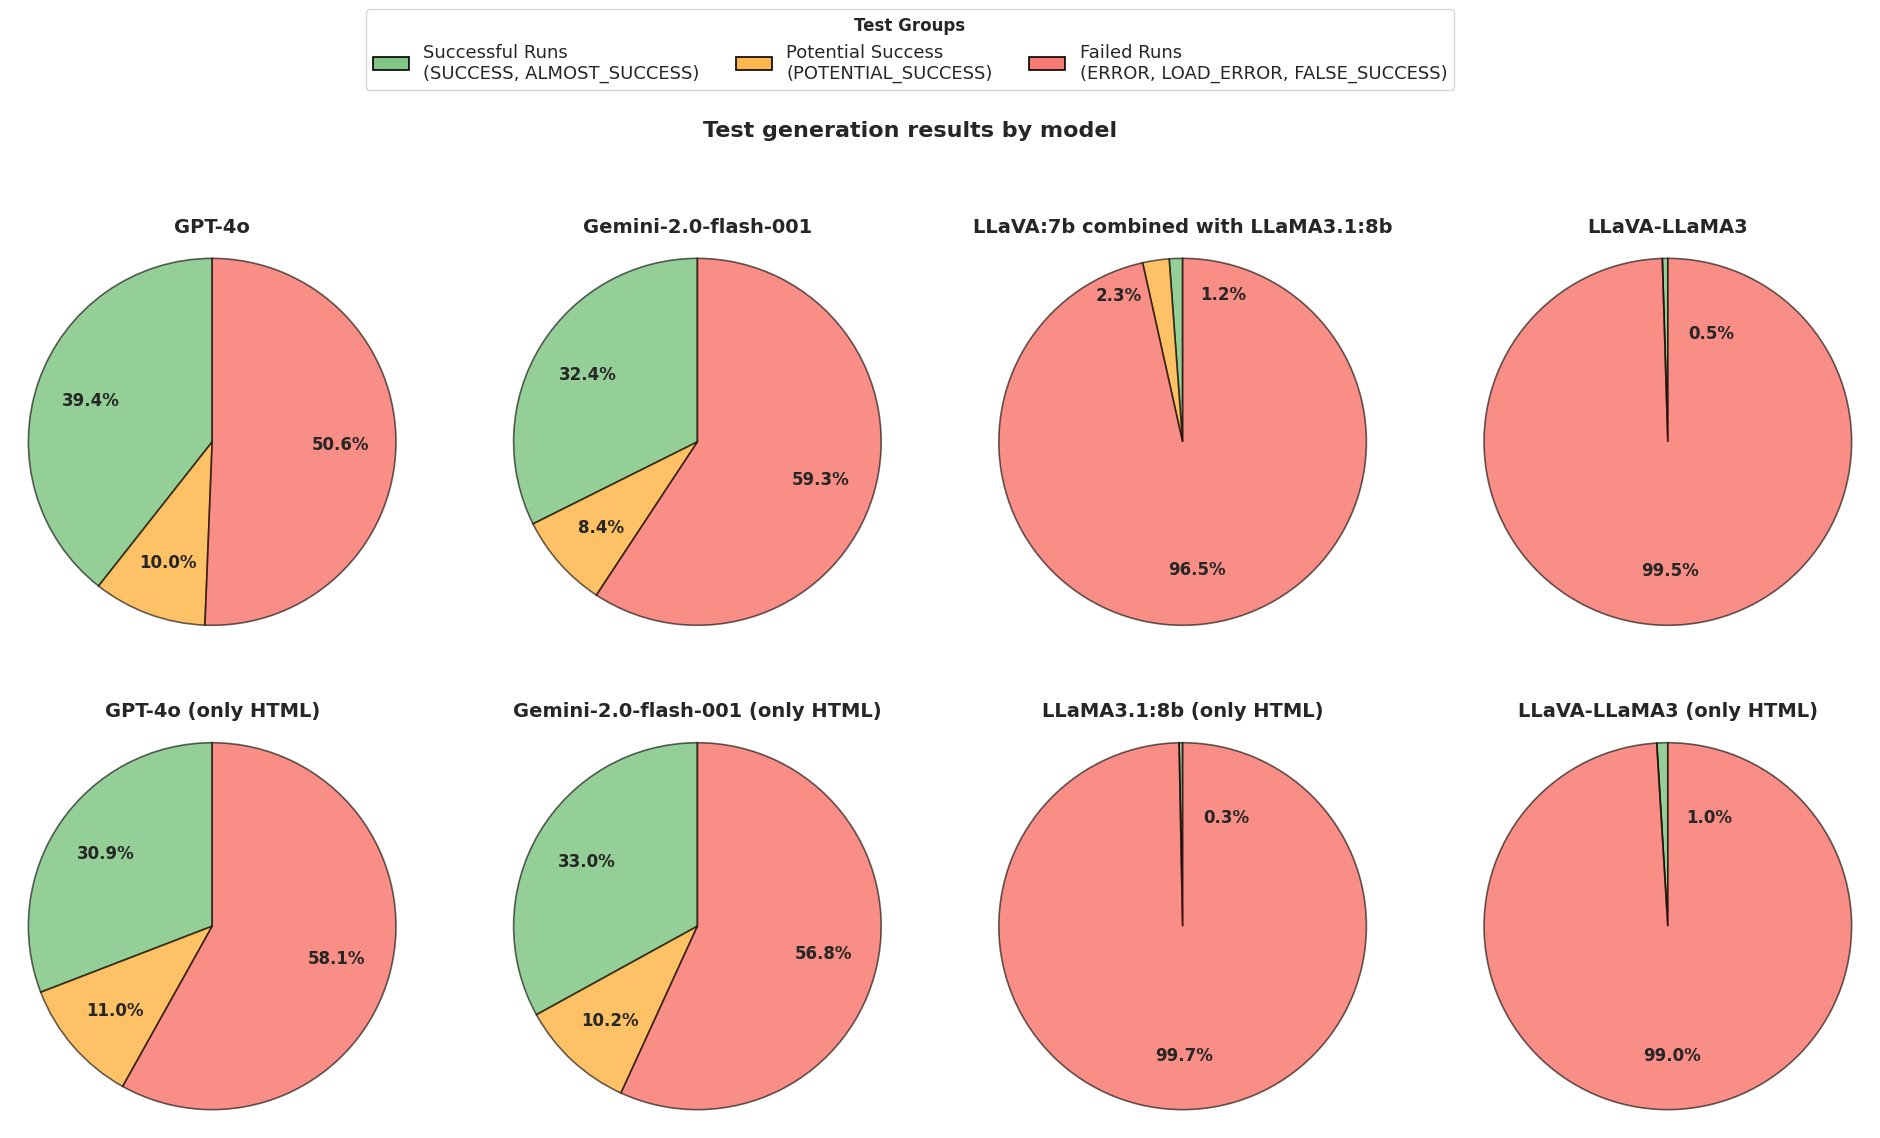

In [21]:
model_order = [
    "GPT-4o",
    "Gemini-2.0-flash-001",
    "LLaVA:7b combined with LLaMA3.1:8b",
    "LLaVA-LLaMA3",
    "GPT-4o (only HTML)",
    "Gemini-2.0-flash-001 (only HTML)",
    "LLaMA3.1:8b (only HTML)",
    "LLaVA-LLaMA3 (only HTML)"
]

success_statuses = ["SUCCESS", "ALMOST_SUCCESS"]
potential_success_statuses = ["POTENTIAL_SUCCESS"]
failed_statuses = ["ERROR", "LOAD_ERROR", "FALSE_SUCCESS"]
models = [m for m in model_order if m in df_fixed_labeled["Model Name"].unique()]

group_colors = {
    "Successful Runs": "#4CAF50",
    "Potential Success": "#FF9800",
    "Failed Runs": "#F44336"
}

n_cols = 4
n_rows = math.ceil(len(models) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 6 * n_rows))
axes = axes.flatten() 

if len(models) == 1:
    axes = [axes]

for i, model in enumerate(models):
    df_model = df_fixed_labeled[df_fixed_labeled["Model Name"] == model]
    success_count = df_model["Status"].isin(success_statuses).sum()
    potential_success_count = df_model["Status"].isin(potential_success_statuses).sum()
    failed_count = df_model["Status"].isin(failed_statuses).sum()
    total = success_count + potential_success_count + failed_count
    counts = [success_count, potential_success_count, failed_count]

    ax = axes[i]
    wedges, _ = ax.pie(
        counts,
        startangle=90,
        colors=[group_colors[g] for g in group_colors.keys()], 
        wedgeprops=dict(edgecolor="black", linewidth=1.2, alpha=0.6)
    )
    
    for j, wedge in enumerate(wedges):
        angle = (wedge.theta2 + wedge.theta1) / 2.
        angle_rad = np.deg2rad(angle)
        x = np.cos(angle_rad)
        y = np.sin(angle_rad)        
        percent = counts[j] / total * 100
        if percent == 0:
            continue  
        label = f"{percent:.1f}%"
        
        if percent >= 8:
            x_offset, y_offset = 0.0, 0.0  
        elif percent >= 2:
            x_offset, y_offset = -0.35, 0.15 
        elif (percent <= 1.4 and model == "LLaVA:7b combined with LLaMA3.1:8b"):
            x_offset, y_offset = 0.35, 0.15  
        elif (percent >= 1.1 and model == "LLaMA3.1:8b (only HTML)"):
            x_offset, y_offset = -0.35, 0.15 
        else:
            x_offset, y_offset = 0.35, -0.15 
            
        ax.text(
            (x + x_offset) * 0.7,
            (y + y_offset) * 0.7,
            label,
            ha='center',
            va='center',
            fontsize=12,
            weight="bold"
        )

    ax.set_title(f"{model}", fontsize=14, weight="bold")
    ax.axis("equal")

legend_labels = [
    Patch(facecolor=(*plt.matplotlib.colors.to_rgba("#4CAF50")[:3], 0.7), edgecolor="black", linewidth=1.2,
          label="Successful Runs\n(SUCCESS, ALMOST_SUCCESS)"),
    Patch(facecolor=(*plt.matplotlib.colors.to_rgba("#FF9800")[:3], 0.7), edgecolor="black", linewidth=1.2,
          label="Potential Success\n(POTENTIAL_SUCCESS)"),
    Patch(facecolor=(*plt.matplotlib.colors.to_rgba("#F44336")[:3], 0.7), edgecolor="black", linewidth=1.2,
          label="Failed Runs\n(ERROR, LOAD_ERROR, FALSE_SUCCESS)")
]

fig.legend(
    handles=legend_labels,
    title="Test Groups",
    title_fontproperties=FontProperties(weight="bold"),
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=3
)

plt.suptitle("Test generation results by model", fontsize=16, weight="bold", y=0.95)
plt.subplots_adjust(top=0.85)
plt.show()


In [22]:
def plot_success_rates_combined_no_legend(df, model_name):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from matplotlib.patches import Patch
    from matplotlib.font_manager import FontProperties

    group_cols = ["Project", "TestModule", "Resolution", "PromptType"]
    group_titles = {
        "Project": "Success rate by project",
        "TestModule": "Success rate by scenario",
        "Resolution": "Success rate by screenshot resolution",
        "PromptType": "Success rate by prompt type"
    }
    model_mapping = {
        "gpt4o": "GPT-4o",
        "gpt4oHTML": "GPT-4o",
        "llava-llama3": "LLaVA-LLaMA3",
        "llava-llamav3": "LLaVA-LLaMA3",
        "llava-llamav3HTML": "LLaVA-LLaMA3",
        "llava7bllama3.1.8b": "LLaMA3.1:8B",
        "llava7bllama3.1.8bHTML": "LLaMA3.1:8B"
    }
    df["Model"] = df["Model"].replace(model_mapping)

    target_statuses = ["SUCCESS", "ALMOST_SUCCESS", "POTENTIAL_SUCCESS"]
    status_labels = {
        "SUCCESS": "SUCCESS (All steps passed)",
        "ALMOST_SUCCESS": "ALMOST_SUCCESS (Automatically fixed tests)",
        "POTENTIAL_SUCCESS": "POTENTIAL_SUCCESS (Missed 1 step)"
    }

    custom_colors = {
        "SUCCESS (All steps passed)": "#4CAF50",
        "ALMOST_SUCCESS (Automatically fixed tests)": "#2196F3",
        "POTENTIAL_SUCCESS (Missed 1 step)": "#FF9800"
    }

    filtered = df[(df["Status"].isin(target_statuses)) & (df["Model"] == model_name)].copy()

    fig, axs = plt.subplots(2, 2, figsize=(18, 10))
    axs = axs.flatten()

    for i, group_col in enumerate(group_cols):
        if group_col == "TestModule":
            filtered_group = filtered.copy()
            filtered_group["GroupKey"] = filtered_group["ReadableName"]
            filtered_group["GroupSort"] = filtered_group["Test Type"]
            sort_order = filtered_group[["GroupKey", "GroupSort"]].drop_duplicates().sort_values("GroupSort")
            category_order = sort_order["GroupKey"].tolist()

            total_df = df[df["Model"] == model_name].copy()
            total_df = total_df[total_df["ReadableName"].notna()]
            total_df["GroupKey"] = total_df["ReadableName"]

        elif group_col == "Resolution":
            filtered_group = filtered[filtered["Resolution Name"] != "No screenshot"].copy()
            filtered_group["GroupKey"] = filtered_group["Resolution Name"]

            total_df = df[(df["Model"] == model_name) & (df["Resolution Name"] != "No screenshot")].copy()
            total_df["GroupKey"] = total_df["Resolution Name"]

            category_order = sorted(filtered_group["GroupKey"].unique())

        else:
            filtered_group = filtered.copy()
            filtered_group["GroupKey"] = filtered_group[group_col]

            total_df = df[df["Model"] == model_name].copy()
            total_df["GroupKey"] = total_df[group_col]

            category_order = sorted(filtered_group["GroupKey"].unique())

        group_counts = (
            filtered_group
            .groupby(["GroupKey", "Status"])
            .size()
            .reset_index(name="count")
        )

        total_counts = (
            total_df
            .groupby("GroupKey")
            .size()
            .reset_index(name="total")
        )

        merged = group_counts.merge(total_counts, on="GroupKey")
        merged["percent"] = (merged["count"] / merged["total"]) * 100
        merged["StatusLabel"] = merged["Status"].map(status_labels)

        ax = axs[i]
        sns.barplot(
            data=merged,
            x="GroupKey",
            y="percent",
            hue="StatusLabel",
            hue_order=list(status_labels.values()),
            palette=custom_colors,
            ax=ax,
            order=category_order
        )

        for patch in ax.patches:
            facecolor = patch.get_facecolor()
            patch.set_facecolor((*facecolor[:3], 0.7))
            patch.set_edgecolor("black")
            patch.set_linewidth(1.2)

        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=11, fontweight="bold")

        ax.set_title(group_titles[group_col], fontsize=13)
        ax.set_ylabel("Percentage (%)")
        ax.set_xlabel(group_col if group_col != "TestModule" else "Scenario")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
        ax.set_ylim(0, 75)
        ax.get_legend().remove()

    plt.tight_layout()
    plt.show()


C:\Users\DK00747\AppData\Local\Temp\ipykernel_27060\1654757694.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
C:\Users\DK00747\AppData\Local\Temp\ipykernel_27060\1654757694.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
C:\Users\DK00747\AppData\Local\Temp\ipykernel_27060\1654757694.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
C:\Users\DK00747\AppData\Local\Temp\ipykernel_27060\1654757694.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklab

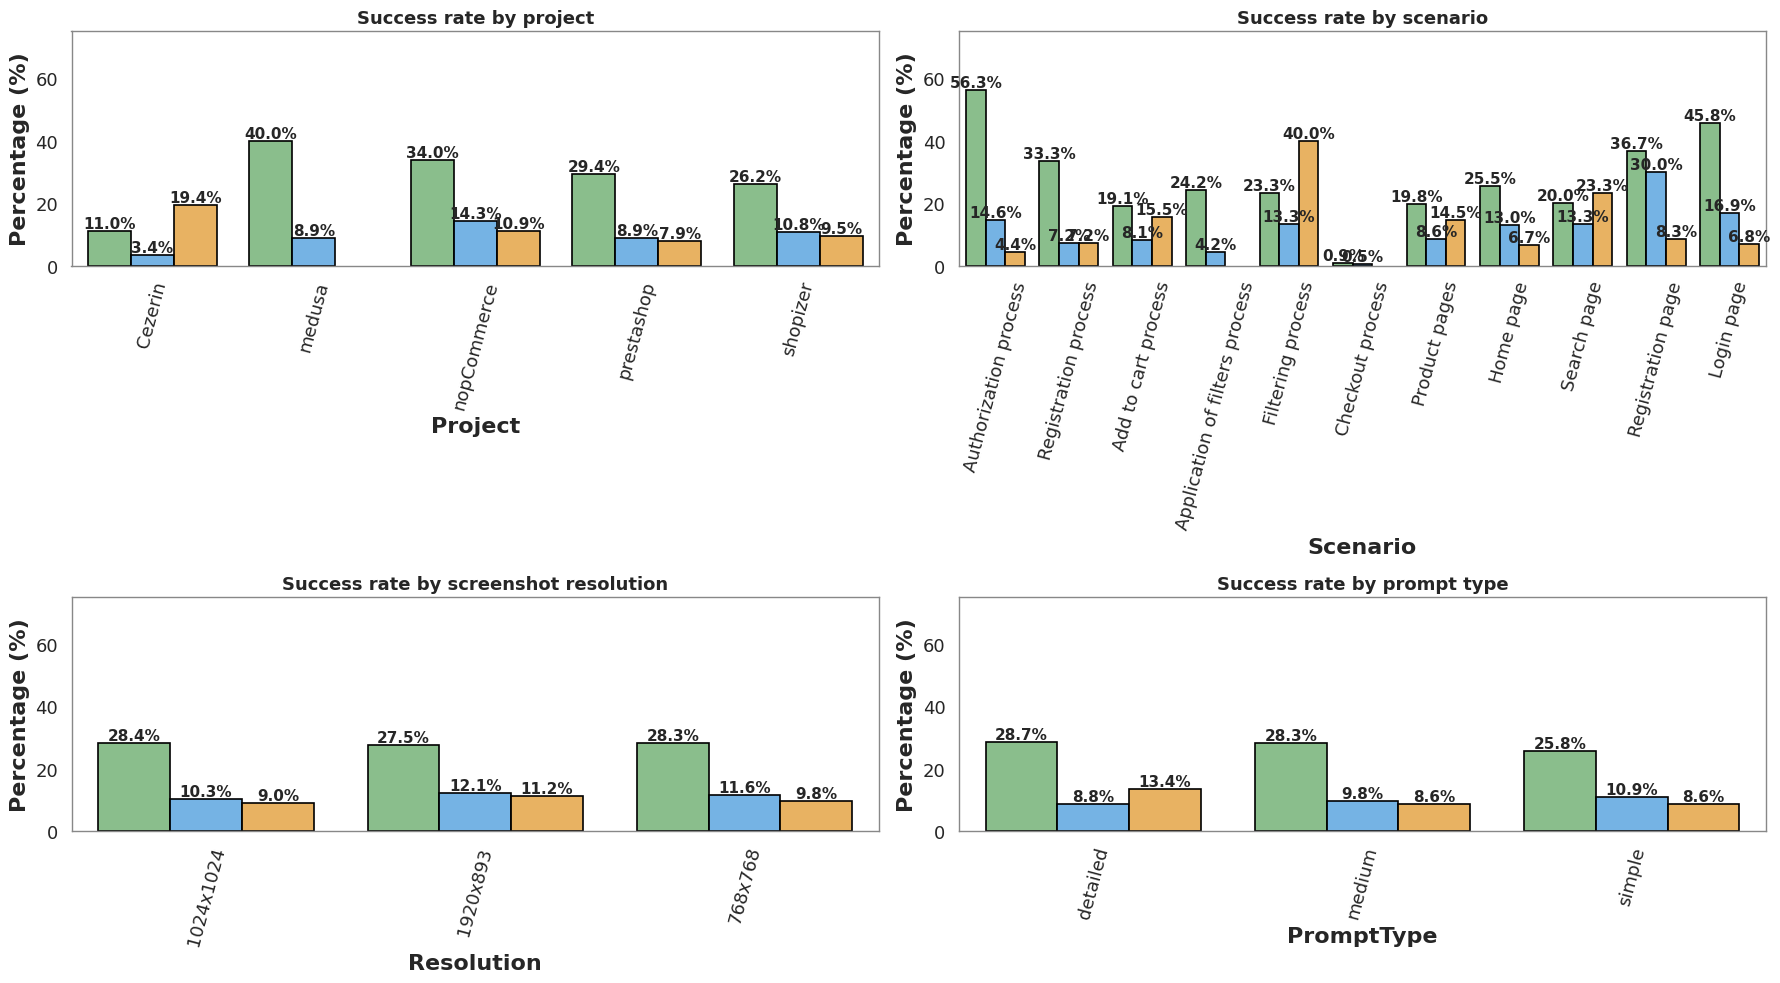

In [23]:
plot_success_rates_combined_no_legend(df_fixed_labeled, "GPT-4o")

C:\Users\DK00747\AppData\Local\Temp\ipykernel_27060\1654757694.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
C:\Users\DK00747\AppData\Local\Temp\ipykernel_27060\1654757694.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
C:\Users\DK00747\AppData\Local\Temp\ipykernel_27060\1654757694.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
C:\Users\DK00747\AppData\Local\Temp\ipykernel_27060\1654757694.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklab

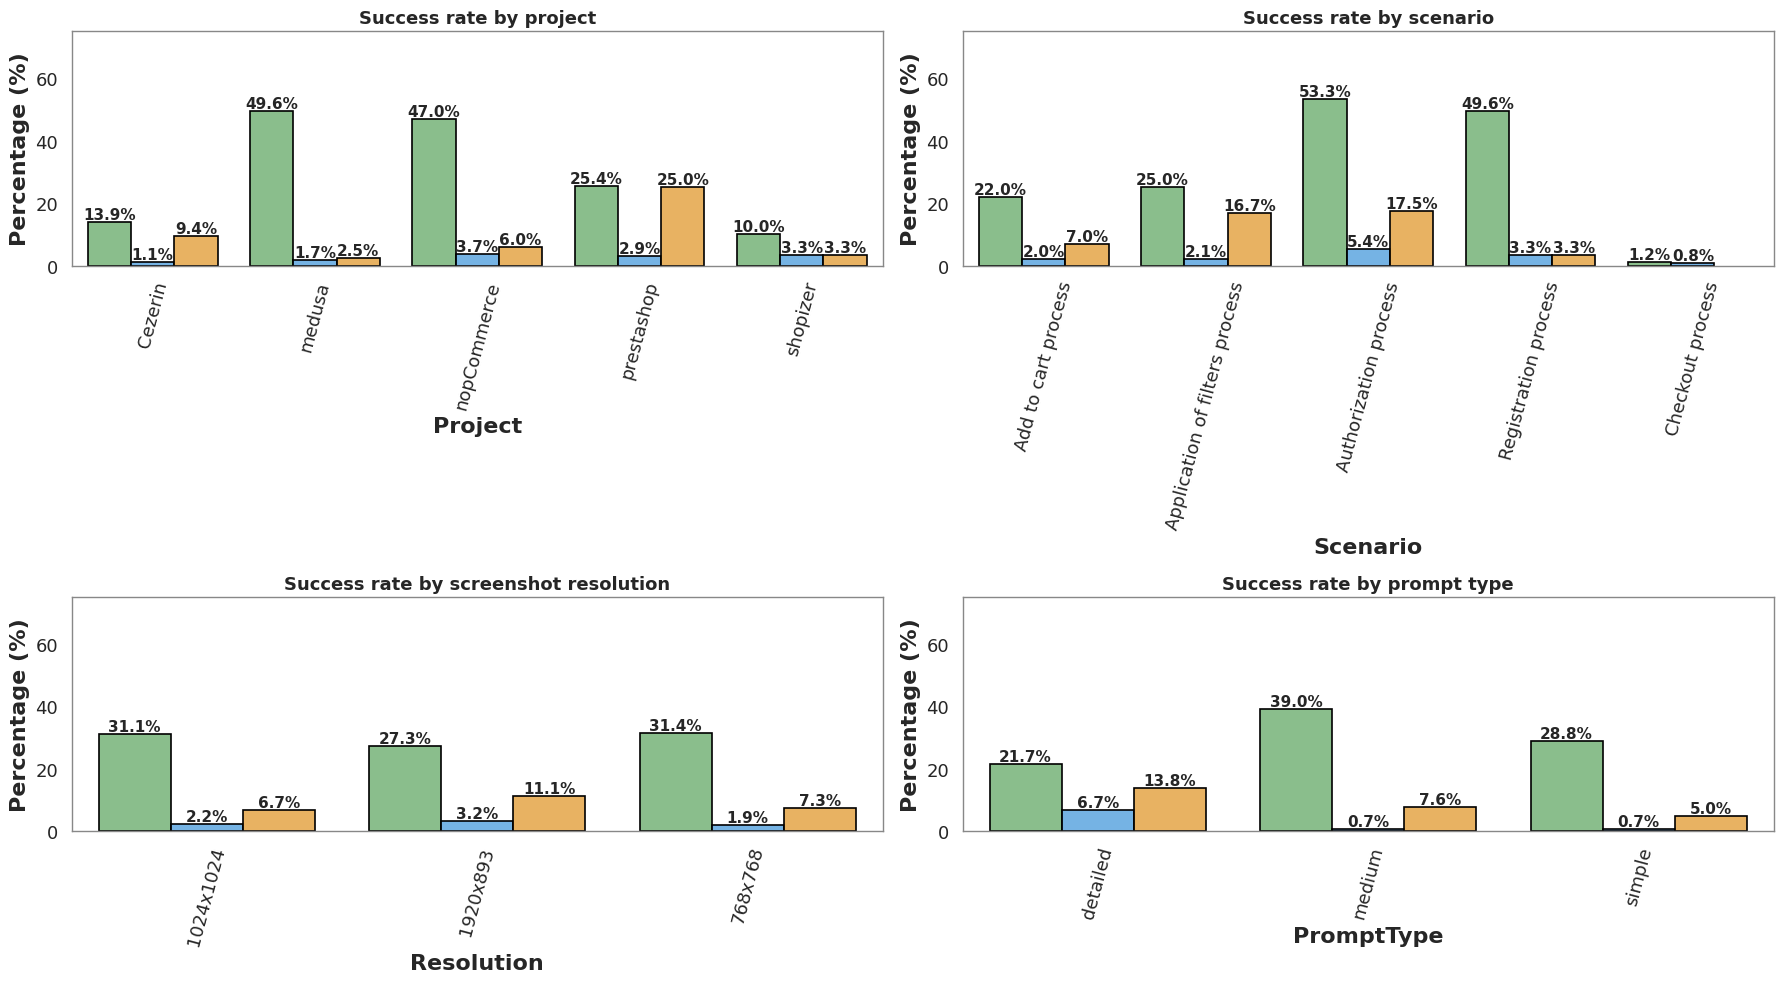

In [24]:
plot_success_rates_combined_no_legend(df_fixed_labeled, "Gemini-2.0-flash-001")

In [25]:
def plot_success_rates_individual(df, model_name):
    group_cols = ["Project", "TestModule", "Resolution", "PromptType"]
    group_titles = {
        "Project": "Success rate by project for " + model_name,
        "TestModule": "Success rate by scenario for " + model_name,
        "Resolution": "Success rate by screenshot resolution for " + model_name,
        "PromptType": "Success rate by prompt type for " + model_name
    }
    model_mapping = {
        "gpt4o": "GPT-4o",
        "gpt4oHTML": "GPT-4o",
        "llava-llama3": "LLaVA-LLaMA3",
        "llava-llamav3": "LLaVA-LLaMA3",
        "llava-llamav3HTML": "LLaVA-LLaMA3",
        "llava7bllama3.1.8b": "LLaMA3.1:8B",
        "llava7bllama3.1.8bHTML": "LLaMA3.1:8B"
    }
    df["Model"] = df["Model"].replace(model_mapping)
    target_statuses = ["SUCCESS", "ALMOST_SUCCESS", "POTENTIAL_SUCCESS"]
    status_labels = {
        "SUCCESS": "SUCCESS (All steps passed)",
        "ALMOST_SUCCESS": "ALMOST_SUCCESS (Automatically fixed tests)",
        "POTENTIAL_SUCCESS": "POTENTIAL_SUCCESS (Missed 1 step)"
    }
    custom_colors = {
        "SUCCESS (All steps passed)": "#4CAF50",
        "ALMOST_SUCCESS (Automatically fixed tests)": "#2196F3",
        "POTENTIAL_SUCCESS (Missed 1 step)": "#FF9800"
    }
    filtered = df[(df["Status"].isin(target_statuses)) & (df["Model"] == model_name)].copy()
    for group_col in group_cols:
        if group_col == "TestModule":
            filtered_group = filtered.copy()
            filtered_group["GroupKey"] = filtered_group["ReadableName"]
            filtered_group["GroupSort"] = filtered_group["Test Type"]
            sort_order = filtered_group[["GroupKey", "GroupSort"]].drop_duplicates().sort_values("GroupSort")
            category_order = sort_order["GroupKey"].tolist()
            total_df = df[df["Model"] == model_name].copy()
            total_df = total_df[total_df["ReadableName"].notna()]
            total_df["GroupKey"] = total_df["ReadableName"]

        elif group_col == "Resolution":
            filtered_group = filtered[filtered["Resolution Name"] != "No screenshot"].copy()
            filtered_group["GroupKey"] = filtered_group["Resolution Name"]
            total_df = df[(df["Model"] == model_name) & (df["Resolution Name"] != "No screenshot")].copy()
            total_df["GroupKey"] = total_df["Resolution Name"]
            category_order = sorted(filtered_group["GroupKey"].unique())

        else:
            filtered_group = filtered.copy()
            filtered_group["GroupKey"] = filtered_group[group_col]
            total_df = df[df["Model"] == model_name].copy()
            total_df["GroupKey"] = total_df[group_col]
            category_order = sorted(filtered_group["GroupKey"].unique())

        group_counts = (
            filtered_group
            .groupby(["GroupKey", "Status"])
            .size()
            .reset_index(name="count")
        )
        total_counts = (
            total_df
            .groupby("GroupKey")
            .size()
            .reset_index(name="total")
        )

        merged = group_counts.merge(total_counts, on="GroupKey")
        merged["percent"] = (merged["count"] / merged["total"]) * 100
        merged["StatusLabel"] = merged["Status"].map(status_labels)

        fig, ax = plt.subplots(figsize=(12, 6))
        sns.barplot(
            data=merged,
            x="GroupKey",
            y="percent",
            hue="StatusLabel",
            hue_order=list(status_labels.values()),
            palette=custom_colors,
            ax=ax,
            order=category_order
        )

        for patch in ax.patches:
            facecolor = patch.get_facecolor()
            patch.set_facecolor((*facecolor[:3], 0.7))  
            patch.set_edgecolor("black")
            patch.set_linewidth(1.2)

        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=13, fontweight="bold")

        ax.set_title(group_titles[group_col], fontsize=15, weight="bold")
        ax.set_ylabel("Percentage (%)", fontsize=13)
        ax.set_xlabel(group_col if group_col != "TestModule" else "Scenario", fontsize=13)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=11)
        ax.set_ylim(0, 65)
        ax.get_legend().remove()

        plt.tight_layout(pad=3.0)
        plt.show()



C:\Users\DK00747\AppData\Local\Temp\ipykernel_27060\1897979405.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=11)


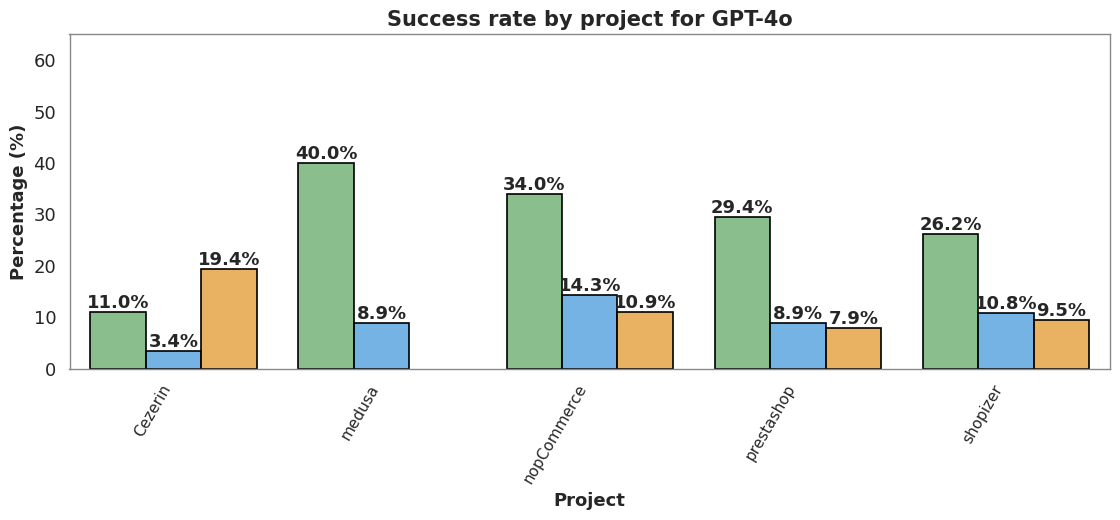

C:\Users\DK00747\AppData\Local\Temp\ipykernel_27060\1897979405.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=11)


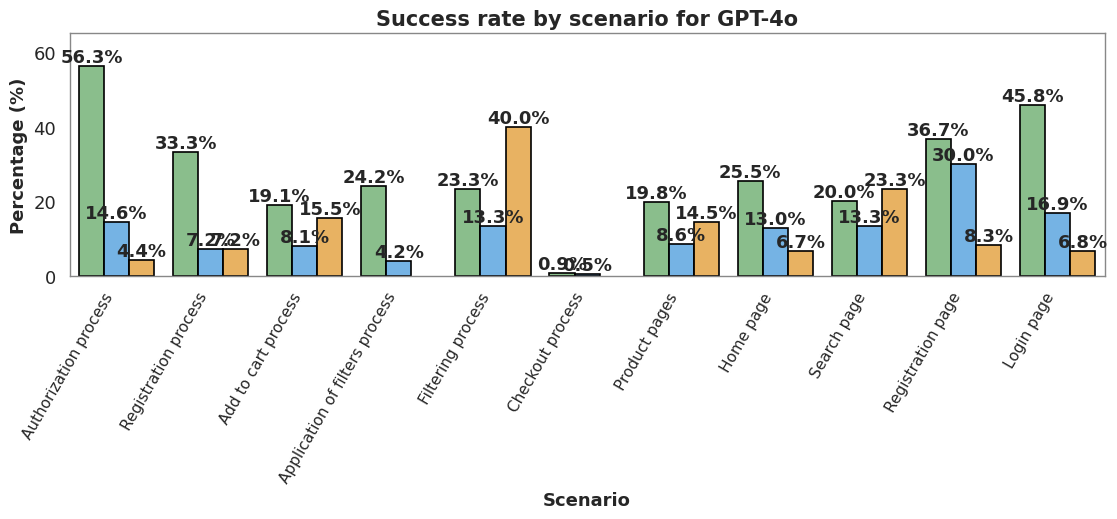

C:\Users\DK00747\AppData\Local\Temp\ipykernel_27060\1897979405.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=11)


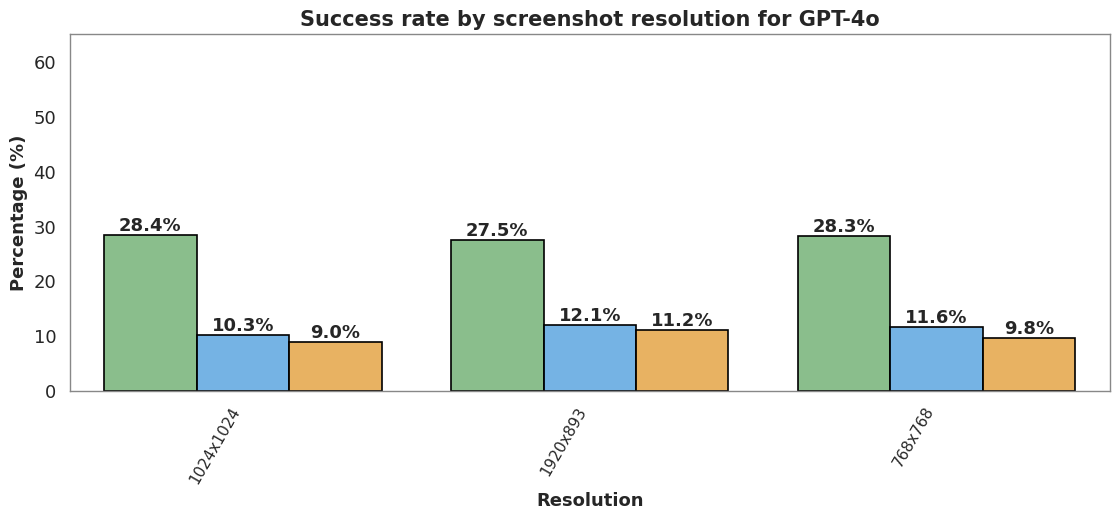

C:\Users\DK00747\AppData\Local\Temp\ipykernel_27060\1897979405.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=11)


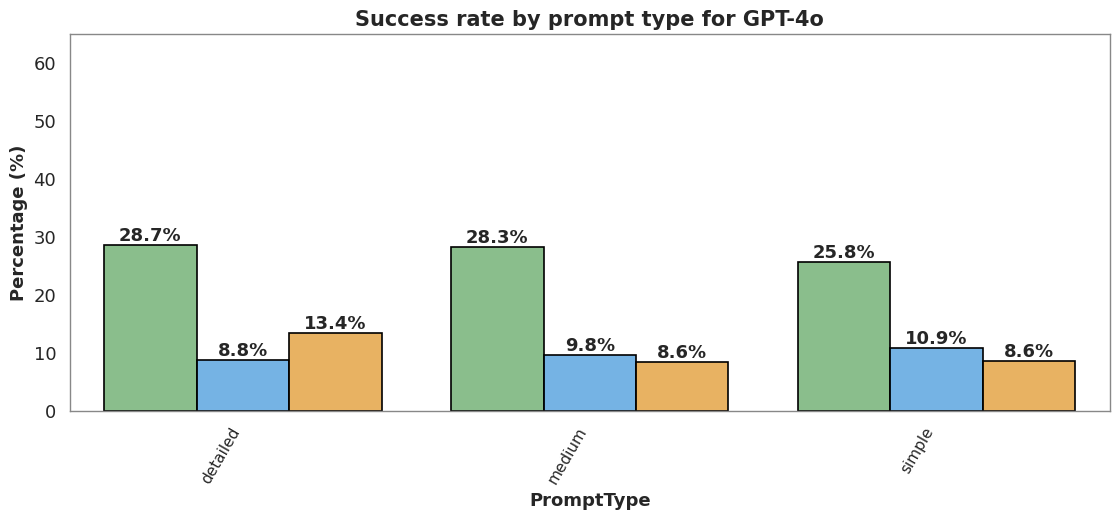

In [26]:
plot_success_rates_individual(df_fixed_labeled, model_name="GPT-4o")

C:\Users\DK00747\AppData\Local\Temp\ipykernel_27060\1897979405.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=11)


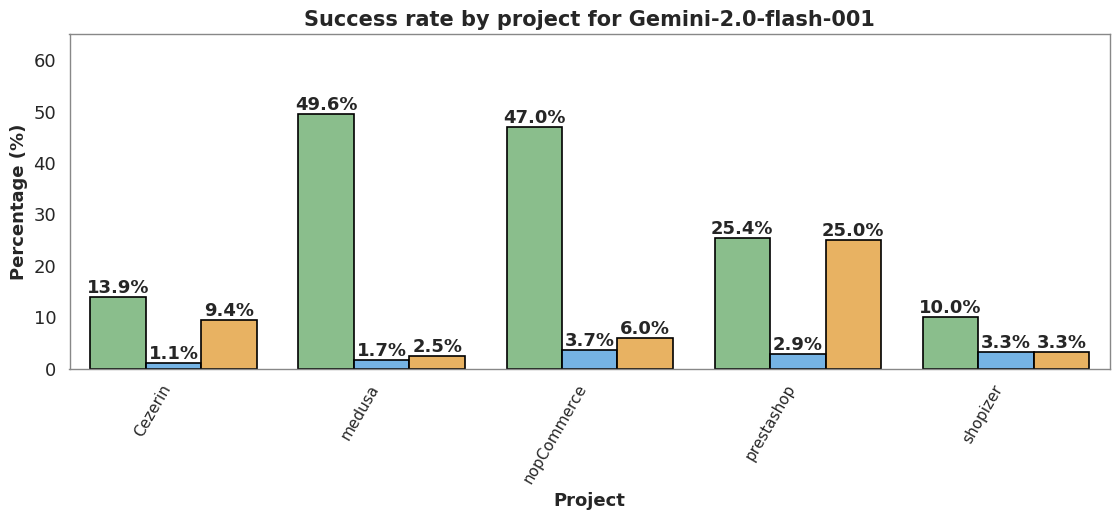

C:\Users\DK00747\AppData\Local\Temp\ipykernel_27060\1897979405.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=11)


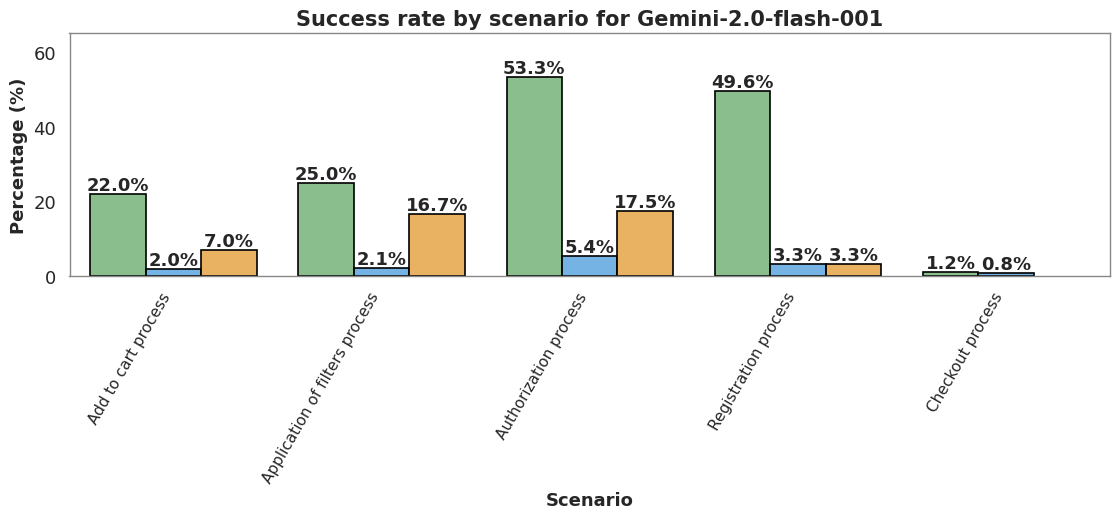

C:\Users\DK00747\AppData\Local\Temp\ipykernel_27060\1897979405.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=11)


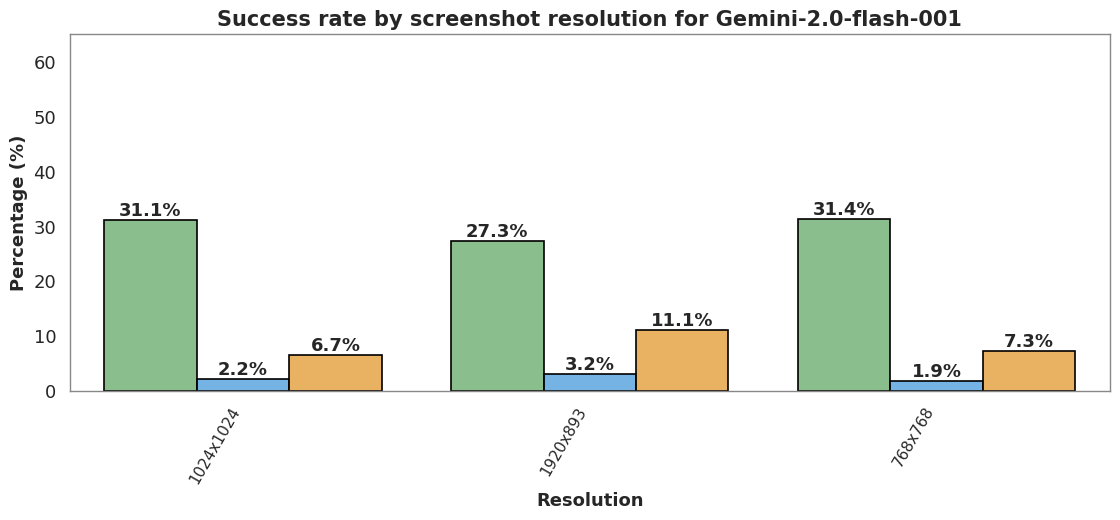

C:\Users\DK00747\AppData\Local\Temp\ipykernel_27060\1897979405.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=11)


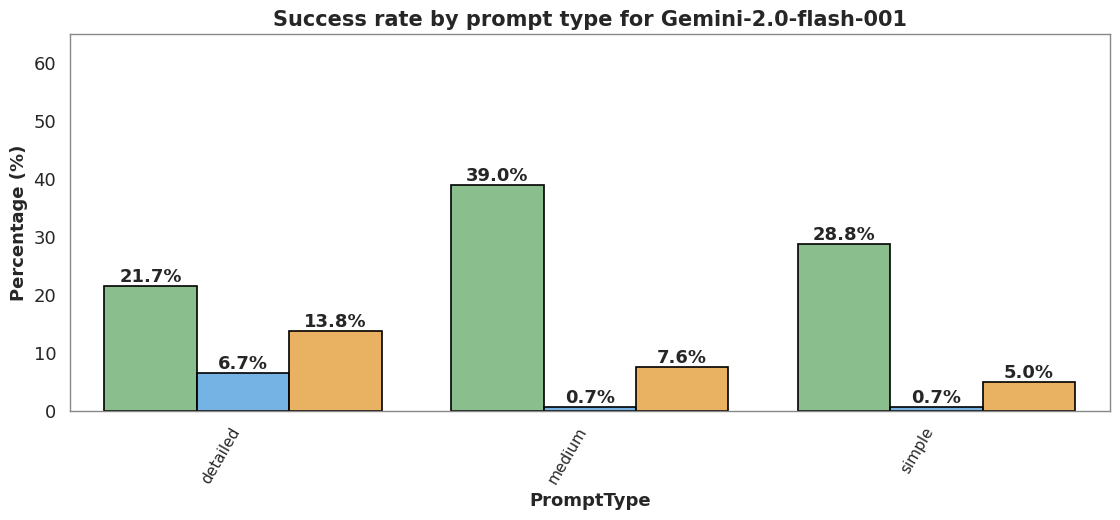

In [27]:
plot_success_rates_individual(df_fixed_labeled, model_name="Gemini-2.0-flash-001")

In [28]:
df_mut = df_mut.loc[:, ~df_mut.columns.str.startswith('Unnamed')]
df_mut["IsSuccess"] = df_mut["Match"] == "Matched"
df_mut["Mismatch"] = df_mut["Match"] == "Mismatch"


In [29]:
mutation_grouped = df_mut.groupby("MutationType")["IsSuccess"].agg(["sum", "count"])
mutation_grouped["success_rate"] = mutation_grouped["sum"] / mutation_grouped["count"] * 100
mutation_grouped = mutation_grouped.sort_values("success_rate", ascending=False)
mutation_type_stats = mutation_grouped

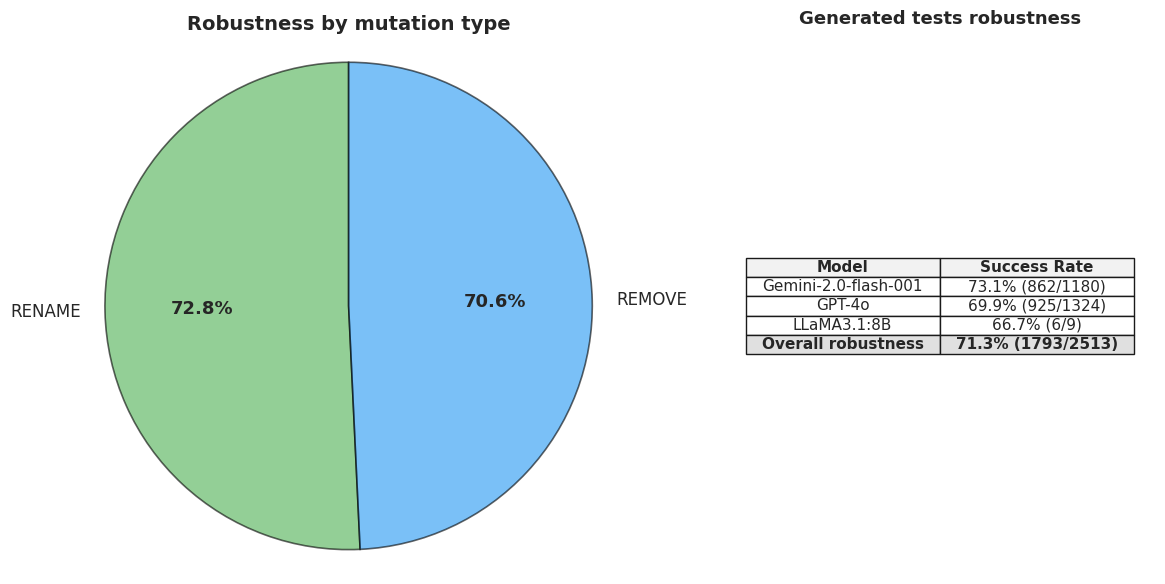

In [30]:
model_mapping = {
    "gpt4o": "GPT-4o",
    "gpt4oHTML": "GPT-4o",    
    "gemini": "Gemini-2.0-flash-001",
    "geminiHTML": "Gemini-2.0-flash-001",
    "llava-llama3": "LLaVA-LLaMA3",
    "llava-llamav3": "LLaVA-LLaMA3",
    "llava-llamav3HTML": "LLaVA-LLaMA3",
    "llava7bllama3.1.8b": "LLaMA3.1:8B",
    "llava7bllama3.1.8bHTML": "LLaMA3.1:8B"
}
df_mut["ModelGroup"] = df_mut["Model"].replace(model_mapping)
df_mut["MutationGroup"] = df_mut["MutationType"].replace({
    "REMOVE1": "REMOVE",
    "REMOVE2": "REMOVE"
})

df_mut = df_mut.loc[:, ~df_mut.columns.str.startswith("Unnamed")]
df_mut["IsSuccess"] = df_mut["Match"] == "Matched"
mutation_type_stats = (
    df_mut.groupby("MutationGroup")["IsSuccess"]
    .agg(["sum", "count"])
    .assign(success_rate=lambda x: x["sum"] / x["count"] * 100)
    .sort_values("success_rate", ascending=False)
)
model_mut = (
    df_mut.groupby("ModelGroup")["IsSuccess"]
    .agg(["sum", "count"])
    .assign(success_rate=lambda x: x["sum"] / x["count"] * 100)
    .sort_values("success_rate", ascending=False)
)

total_overall = df_mut["IsSuccess"].count()
successes_overall = df_mut["IsSuccess"].sum()
overall_success_rate = round(successes_overall / total_overall * 100, 1)

custom_colors = ["#4CAF50", "#2196F3", "#F44336", "#9C27B0"]
mutation_labels = mutation_type_stats.index.tolist()
mutation_values = mutation_type_stats["success_rate"].values

def show_real_pct(pct, allvals):
    absolute = int(round(pct / 100. * sum(allvals)))
    closest_idx = (abs(mutation_values - absolute)).argmin()
    return f"{mutation_values[closest_idx]:.1f}%"

fig = plt.figure(figsize=(12, 6))
gs = GridSpec(1, 2, width_ratios=[1.4, 1])

ax0 = fig.add_subplot(gs[0])
wedges, texts, autotexts = ax0.pie(
    mutation_values,
    labels=mutation_labels,
    autopct=lambda pct: show_real_pct(pct, mutation_values),
    startangle=90,
    colors=custom_colors[:len(mutation_values)],
    wedgeprops=dict(edgecolor="black", linewidth=1.2, alpha=0.6),
    textprops={"fontsize": 12}
)
for autotext in autotexts:
    autotext.set_fontsize(13)
    autotext.set_weight("bold")
ax0.set_title("Robustness by mutation type", fontsize=14)
ax0.axis("equal")

ax1 = fig.add_subplot(gs[1])
ax1.axis("off")

table_data = [
    [model, f"{row['success_rate']:.1f}% ({int(row['sum'])}/{int(row['count'])})"]
    for model, row in model_mut.iterrows()
]

table_data.append(["Overall robustness", f"{overall_success_rate:.1f}% ({int(successes_overall)}/{int(total_overall)})"])
column_labels = ["Model", "Success Rate"]
table = ax1.table(
    cellText=table_data,
    colLabels=column_labels,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(0.9, 1.0)


for (row_idx, col_idx), cell in table.get_celld().items():
    if row_idx == 0:
        cell.set_text_props(weight='bold')
        cell.set_facecolor("#f2f2f2")
    elif row_idx == len(table_data): 
        cell.set_text_props(weight='bold')
        cell.set_facecolor("#e0e0e0")

ax1.set_title("Generated tests robustness", fontsize=13, pad=10)

plt.tight_layout()
plt.show()


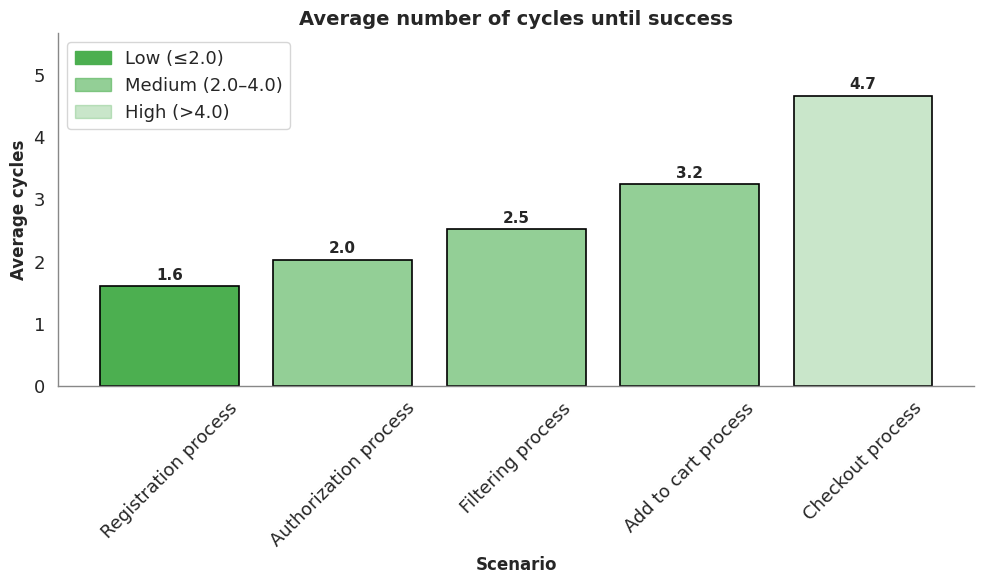

In [31]:
scenario_mapping = {
    "test_filter": "Filtering process",
    "test_checkout": "Checkout process",
    "test_addtocart": "Add to cart process",
    "test_login": "Authorization process",
    "test_register": "Registration process"
}
successful_runs = (
    df_loop.groupby(["project", "model", "run", "process"])
    .filter(lambda x: "SUCCESS" in x["status"].values)
)
successful_cycles = successful_runs[successful_runs["status"] == "SUCCESS"]
summary_cycles = (
    successful_cycles.groupby("process")["cycle"]
    .mean()
    .reset_index()
    .rename(columns={"cycle": "avg_cycles"})
)

summary_cycles = summary_cycles.sort_values("avg_cycles", ascending=True)
summary_cycles["process"] = summary_cycles["process"].replace(scenario_mapping)

base_rgb = plt.matplotlib.colors.to_rgb("#4CAF50") 

def get_alpha(value):
    if value <= 2.0:
        return 1.0  
    elif value <= 4.0:
        return 0.6  
    else:
        return 0.3  
summary_cycles["alpha"] = summary_cycles["avg_cycles"].apply(get_alpha)
colors = [(base_rgb[0], base_rgb[1], base_rgb[2], alpha) for alpha in summary_cycles["alpha"]]

plt.figure(figsize=(10, 6))
bars = plt.bar(
    summary_cycles["process"],
    summary_cycles["avg_cycles"],
    color=colors,
    edgecolor="black",
    linewidth=1.2
)

for bar, value in zip(bars, summary_cycles["avg_cycles"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        value + 0.1,
        f"{value:.1f}",
        ha="center",
        fontsize=11,
        fontweight="bold"
    )

legend_labels = [
    ("Low (≤2.0)", 1.0),
    ("Medium (2.0–4.0)", 0.6),
    ("High (>4.0)", 0.3)
]
legend_patches = [
    mpatches.Patch(
        color=(base_rgb[0], base_rgb[1], base_rgb[2], alpha),
        label=label
    )
    for label, alpha in legend_labels
]
plt.legend(handles=legend_patches, loc="upper left")

plt.title("Average number of cycles until success", fontsize=14)
plt.ylabel("Average cycles", fontsize=12)
plt.xlabel("Scenario", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, summary_cycles["avg_cycles"].max() + 1)
plt.grid(False)

sns.despine()
plt.tight_layout()
plt.show()


In [32]:
status_order = ["SUCCESS", "ALMOST_SUCCESS", "POTENTIAL_SUCCESS", "FAIL", "ERROR", "LOAD_ERROR", "FALSE_SUCCESS"]
def prepare_status_table(df, label, adjust_success=False):
    counts = df["Status"].value_counts().reindex(status_order).fillna(0).astype(int)
    if adjust_success and "SUCCESS" in counts:
        counts["SUCCESS"] = max(0, counts["SUCCESS"] - 1)
    total = counts.sum()
    percents = (counts / total * 100).round(1)
    combined = percents.astype(str) + '% (' + counts.astype(str) + ')'
    return pd.DataFrame({label: combined}), total

table_initial, total_initial = prepare_status_table(df_tests, "Initial results", adjust_success=False)
table_after_fix, total_after = prepare_status_table(df_fixed_labeled, "After ADJUSTMENT", adjust_success=True)
summary_table = pd.concat([table_initial, table_after_fix], axis=1)

total_row = pd.DataFrame({
    "Initial results": f"100.0% ({total_initial})",
    "After ADJUSTMENT": f"100.0% ({total_after})"
}, index=["Total"])

summary_table = pd.concat([summary_table, total_row])
display(summary_table)



,Initial results,After ADJUSTMENT
SUCCESS,21.4% (948),22.7% (1005)
ALMOST_SUCCESS,0.0% (0),5.9% (259)
POTENTIAL_SUCCESS,0.0% (0),7.9% (349)
FAIL,23.3% (1032),0.0% (0)
ERROR,45.7% (2024),52.6% (2328)
LOAD_ERROR,9.2% (408),10.6% (471)
FALSE_SUCCESS,0.3% (14),0.3% (14)
Total,100.0% (4426),100.0% (4426)


In [33]:
df_grouped = (
    df_loop.groupby(["model", "project", "process", "run"])
    .agg(success=("status", lambda x: "SUCCESS" in x.values))
    .reset_index()
)
df_summary = (
    df_grouped.groupby(["model", "project", "process"])
    .agg(
        total_runs=("run", "nunique"),
        success_runs=("success", "sum")
    )
    .reset_index()
)

df_summary["fail_runs"] = df_summary["total_runs"] - df_summary["success_runs"]
df_summary["success_rate"] = (df_summary["success_runs"] / df_summary["total_runs"]) * 100

cycles_to_success = df_loop[df_loop["status"] == "SUCCESS"]
avg_cycles = (
    cycles_to_success.groupby(["model", "project", "process"])["cycle"]
    .mean()
    .reset_index()
    .rename(columns={"cycle": "avg_cycles_success"})
)

df_summary = df_summary.merge(avg_cycles, on=["model", "project", "process"], how="left")

df_summary["avg_cycles_success"] = df_summary.apply(
    lambda row: 0 if row["success_rate"] == 0 else row["avg_cycles_success"],
    axis=1
)

scenario_mapping = {
    "test_filter": "Filtering process",
    "test_checkout": "Checkout process",
    "test_addtocart": "Add to cart process",
    "test_login": "Authorization process",
    "test_register": "Registration process"
}
df_summary["process"] = df_summary["process"].replace(scenario_mapping)

df_summary = df_summary.rename(columns={
    "model": "Model",
    "project": "Project",
    "process": "Scenario",
    "total_runs": "Total runs",
    "success_runs": "Successful runs",
    "fail_runs": "Failed runs",
    "success_rate": "Success rate (%)",
    "avg_cycles_success": "Avg. cycles to success"
})

df_summary = df_summary.sort_values(by=["Model", "Project", "Success rate (%)"], ascending=[True, True, False])


In [34]:
from IPython.display import display, HTML
display(HTML("<h3>Summary of feedback loop results by model, project and scenario</h3>"))
for model in df_summary["Model"].unique():
    df_model = df_summary[df_summary["Model"] == model].copy()
    styled_df = df_model.style.format({
        "Success rate (%)": "{:.1f}%",
        "Avg. cycles to success": "{:.2f}",
        "Total runs": "{:.0f}",
        "Successful runs": "{:.0f}",
        "Failed runs": "{:.0f}"
    }).background_gradient(
        subset=["Success rate (%)"], cmap="Greens"
    ).hide(axis="index")
    display(HTML(f"<h4>Model: {model}</h4>"))
    display(styled_df)

Model,Project,Scenario,Total runs,Successful runs,Failed runs,Success rate (%),Avg. cycles to success
gemini,Cezerin,Filtering process,5,5,0,100.0%,2.80
gemini,Cezerin,Add to cart process,5,1,4,20.0%,4.00
gemini,Cezerin,Checkout process,5,0,5,0.0%,0.00
gemini,medusa,Authorization process,5,5,0,100.0%,1.00
gemini,medusa,Registration process,5,4,1,80.0%,1.00
gemini,medusa,Add to cart process,5,1,4,20.0%,5.00
gemini,medusa,Checkout process,5,0,5,0.0%,0.00
gemini,nopCommerce,Add to cart process,5,5,0,100.0%,2.60
gemini,nopCommerce,Authorization process,5,5,0,100.0%,2.00
gemini,nopCommerce,Filtering process,5,4,1,80.0%,1.25


Model,Project,Scenario,Total runs,Successful runs,Failed runs,Success rate (%),Avg. cycles to success
gpt4o,Cezerin,Add to cart process,5,5,0,100.0%,2.20
gpt4o,Cezerin,Filtering process,5,2,3,40.0%,1.00
gpt4o,Cezerin,Checkout process,5,0,5,0.0%,0.00
gpt4o,medusa,Registration process,5,5,0,100.0%,1.00
gpt4o,medusa,Authorization process,5,4,1,80.0%,1.25
gpt4o,medusa,Add to cart process,5,0,5,0.0%,0.00
gpt4o,medusa,Checkout process,5,0,5,0.0%,0.00
gpt4o,nopCommerce,Filtering process,5,5,0,100.0%,1.80
gpt4o,nopCommerce,Authorization process,5,4,1,80.0%,2.00
gpt4o,nopCommerce,Registration process,5,4,1,80.0%,2.50


In [35]:
df_success_only = df_summary[df_summary["Success rate (%)"] > 0].copy()
cycles_avg = (
    df_success_only.groupby(["Project", "Scenario"])["Avg. cycles to success"]
    .mean()
    .reset_index()
    .rename(columns={"Avg. cycles to success": "Avg. cycles to success (success only)"})
)

df_combined = (
    df_summary.groupby(["Project", "Scenario"])
    .agg({
        "Success rate (%)": "mean",
        "Total runs": "sum",
        "Successful runs": "sum",
        "Failed runs": "sum"
    })
    .reset_index()
)

df_combined = df_combined.merge(
    cycles_avg,
    on=["Project", "Scenario"],
    how="left"
)

df_combined["Success rate (%)"] = df_combined["Success rate (%)"].round(1)
df_combined["Avg. cycles to success (success only)"] = df_combined["Avg. cycles to success (success only)"].round(2)

df_combined = df_combined.sort_values(by=["Project", "Success rate (%)"], ascending=[True, False])
total_row = pd.DataFrame([{
    "Project": "TOTAL",
    "Scenario": "",
    "Success rate (%)": df_combined["Success rate (%)"].mean().round(1),
    "Avg. cycles to success (success only)": df_combined["Avg. cycles to success (success only)"].mean().round(2),
    "Total runs": df_combined["Total runs"].sum(),
    "Successful runs": df_combined["Successful runs"].sum(),
    "Failed runs": df_combined["Failed runs"].sum()
}])
df_combined_with_total = pd.concat([df_combined, total_row], ignore_index=True)
styled_combined = df_combined_with_total.style.format({
    "Success rate (%)": "{:.1f}%",
    "Avg. cycles to success (success only)": "{:.2f}",
    "Total runs": "{:.0f}",
    "Successful runs": "{:.0f}",
    "Failed runs": "{:.0f}"
}, na_rep="-").background_gradient(
    subset=["Success rate (%)"], cmap="Greens"
).hide(axis="index")

display(HTML("<h3>Combined feedback loop results (averaged across models)</h3>"))
display(styled_combined)


Project,Scenario,Success rate (%),Total runs,Successful runs,Failed runs,Avg. cycles to success (success only)
Cezerin,Filtering process,70.0%,10,7,3,1.90
Cezerin,Add to cart process,60.0%,10,6,4,3.10
Cezerin,Checkout process,0.0%,10,0,10,-
medusa,Authorization process,90.0%,10,9,1,1.12
medusa,Registration process,90.0%,10,9,1,1.00
medusa,Add to cart process,10.0%,10,1,9,5.00
medusa,Checkout process,0.0%,10,0,10,-
nopCommerce,Authorization process,90.0%,10,9,1,2.00
nopCommerce,Filtering process,90.0%,10,9,1,1.52
nopCommerce,Add to cart process,80.0%,10,8,2,3.13


In [36]:
def compute_metrics_table(df, group_by_field):
    df = df.copy()
    df["WasReclassified"] = df["Status"].isin(["ALMOST_SUCCESS", "POTENTIAL_SUCCESS"])
    total = df.groupby(group_by_field).size().rename("Total")

    full_success = df[df["Status"] == "SUCCESS"].groupby(group_by_field).size().rename("Full success")
    partial_success = df[df["Status"] == "ALMOST_SUCCESS"].groupby(group_by_field).size().rename("Partial success")
    potential_success = df[df["Status"] == "POTENTIAL_SUCCESS"].groupby(group_by_field).size().rename("Potential success")
    overall_usefulness = df[df["Status"].isin(["SUCCESS", "ALMOST_SUCCESS", "POTENTIAL_SUCCESS"])] \
        .groupby(group_by_field).size().rename("Overall usefulness")
    critical_errors = df[df["Status"].isin(["ERROR", "LOAD_ERROR"])].groupby(group_by_field).size().rename("Critical errors")
    false_success = df[df["Status"] == "FALSE_SUCCESS"].groupby(group_by_field).size().rename("False successes")
    reclassified = df[df["WasReclassified"]].groupby(group_by_field).size().rename("Reclassified statuses")

    metrics = pd.concat([
        total,
        full_success,
        partial_success,
        potential_success,
        overall_usefulness,
        critical_errors,
        false_success,
        reclassified
    ], axis=1).fillna(0)

    for col in metrics.columns:
        if col != "Total":
            metrics[col] = ((metrics[col] / metrics["Total"]) * 100).round(1).astype(str) + "%"

    metrics = metrics.drop(columns=["Total"]).reset_index()
    return metrics


In [37]:
metrics_by_model = compute_metrics_table(df_fixed_labeled, "Model")
metrics_by_prompt = compute_metrics_table(df_fixed_labeled, "PromptType")
metrics_by_resolution = compute_metrics_table(df_fixed_labeled[df_fixed_labeled["Resolution Name"] != "No screenshot"], "Resolution Name")
metrics_by_project = compute_metrics_table(df_fixed_labeled, "Project")
metrics_by_test_type = compute_metrics_table(df_fixed_labeled, "Test Type")
metrics_by_module = compute_metrics_table(df_fixed_labeled, "ReadableName")  

In [38]:
display(metrics_by_model)
display(metrics_by_prompt)
display(metrics_by_resolution)
display(metrics_by_project)
display(metrics_by_test_type)
display(metrics_by_module)

,Model,Full success,Partial success,Potential success,Overall usefulness,Critical errors,False successes,Reclassified statuses
0,GPT-4o,27.6%,9.8%,10.2%,47.6%,52.4%,0.0%,20.1%
1,Gemini-2.0-flash-001,29.8%,2.7%,8.8%,41.3%,58.7%,0.0%,11.5%
2,LLaMA3.1:8B,0.5%,0.2%,1.0%,1.7%,96.2%,2.1%,1.2%
3,LLaVA-LLaMA3,0.3%,0.3%,0.0%,0.6%,98.7%,0.6%,0.3%


,PromptType,Full success,Partial success,Potential success,Overall usefulness,Critical errors,False successes,Reclassified statuses
0,detailed,21.0%,6.5%,11.0%,38.5%,61.1%,0.3%,17.5%
1,medium,25.6%,5.2%,6.7%,37.5%,62.2%,0.3%,11.9%
2,simple,21.5%,5.8%,5.9%,33.3%,66.3%,0.3%,11.8%


,Resolution Name,Full success,Partial success,Potential success,Overall usefulness,Critical errors,False successes,Reclassified statuses
0,1024x1024,29.4%,7.5%,8.1%,45.0%,55.0%,0.0%,15.6%
1,1920x893,21.8%,7.1%,9.2%,38.1%,60.7%,1.1%,16.3%
2,672x672,0.4%,0.0%,0.9%,1.3%,98.7%,0.0%,0.9%
3,768x768,29.4%,8.2%,8.9%,46.5%,53.5%,0.0%,17.1%


,Project,Full success,Partial success,Potential success,Overall usefulness,Critical errors,False successes,Reclassified statuses
0,Cezerin,9.0%,2.0%,12.1%,23.2%,76.6%,0.3%,14.1%
1,medusa,42.3%,4.4%,1.3%,48.0%,52.0%,0.0%,5.8%
2,nopCommerce,30.8%,8.3%,7.4%,46.5%,53.2%,0.3%,15.7%
3,prestashop,22.1%,5.7%,10.2%,37.9%,61.6%,0.5%,15.8%
4,shopizer,16.6%,6.7%,6.1%,29.4%,70.2%,0.4%,12.8%


,Test Type,Full success,Partial success,Potential success,Overall usefulness,Critical errors,False successes,Reclassified statuses
0,process,25.1%,4.5%,7.5%,37.1%,62.6%,0.2%,12.0%
1,ui,18.2%,8.5%,8.6%,35.2%,64.3%,0.5%,17.0%


,ReadableName,Full success,Partial success,Potential success,Overall usefulness,Critical errors,False successes,Reclassified statuses
0,Add to cart process,17.4%,4.2%,9.4%,31.0%,68.8%,0.1%,13.6%
1,Application of filters process,22.0%,2.5%,9.9%,34.3%,65.2%,0.5%,12.3%
2,Authorization process,45.3%,8.9%,8.4%,62.6%,37.3%,0.1%,17.3%
3,Checkout process,0.9%,0.6%,0.0%,1.5%,98.3%,0.2%,0.6%
4,Filtering process,16.7%,9.5%,28.6%,54.8%,44.6%,0.6%,38.1%
5,Home page,17.3%,8.8%,4.5%,30.6%,69.4%,0.0%,13.3%
6,Login page,32.5%,12.0%,4.8%,49.4%,50.6%,0.0%,16.9%
7,Product pages,14.3%,6.1%,10.6%,31.0%,68.5%,0.5%,16.7%
8,Registration page,26.2%,21.4%,6.0%,53.6%,45.2%,1.2%,27.4%
9,Registration process,32.9%,4.9%,4.6%,42.4%,57.0%,0.6%,9.6%
